Quadrupedal Walking Frog Code

This code analyses the force and kinematic data for multiple frog species walked across a multi-axis force platform. The x, y, and z forces were analysed. Using the x, y and z force data, we calculate the resultant force (). Joint angle data was collect via digitization of high-speed videography in two views (dorsal and lateral) over two strides for the fore- and hindlimbs.
Contributors:
J Fabian Dubon
M Kearns
CM Reynaga
Last updated:
Dec 28, 2022 /April 5, 2024




Setting Directory 

In [1]:
import pandas as pd 
import numpy as np 
import openpyxl as pyxl  
import matplotlib.pyplot as plt
import math as math
 
#'/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/walks_workbook.xlsx'


Parameters
A single stride was defined as: The start of the stride begins the moment the forelimb phallange/limb closest to the lateral veiew camera makes contact with the ground. The stride ends once all limbs have cycled through, until the start of the same forelimb is about to make contact again with the ground to begin a new stride.
Video Information
This section will read in the parameters from the following imported excel sheet.
Defines a variable with the file name as a string

In [2]:
params = '/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/walks_workbook.xlsx'


Imports data file and saves the file as a struct named parameters, the struct is organized as within two fields (1) data and (2) textdata. Any column names or text values within the spreadsheet will be in textdata and any numerical values will be in data.

In [3]:
parameters = pd.read_excel(params)

elects which row to process within the excel parameters sheet
Change number based upon the row you'd like to process within the excel spread sheet and save the matlab code before you run the code

In [4]:
excel_row_to_process = 28 #must start at 2 with only FL and 28 with FL and HL bc of pandas structure
film_side_right = True                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Video/Force Sampling Information
Reading in parameters from excel sheet.


In [5]:
row_to_process = excel_row_to_process-1

# Print the size of the parameters variable
display(parameters.shape)

if 'Date' in parameters.columns:
    date = str(int(parameters['Date'].iloc[row_to_process])) #iloc is more of a personal pref #must change to int first to get rid off .0 
else:
    print("Error: 'Date' not found in DataFrame")

genus_species = 'pb' # Phrynomantis bifasciatus

if 'Ind.' in parameters.columns:
    individual = str(int(parameters['Ind.'].iloc[row_to_process]))
else:
    print("Error: 'Ind.' not found in DataFrame")

if 'Walk' in parameters.columns:
    walk_num = str(int(parameters['Walk'].iloc[row_to_process]))
else:
    print("Error: 'Walk' not found in DataFrame")

print(walk_num)
walk_seq = date + '_' + genus_species + individual + '_walk'+ walk_num 
fps = 250

print(walk_seq)


(62, 30)

2
20210709_pb2_walk2


In [6]:
#frames per second (fps) high speed video frame rate
igor_sr = 10000

if 'Ind. Weight (g)' in parameters.columns:
    body_mass = parameters['Ind. Weight (g)'].iloc[row_to_process]
else:
    print("Error: 'Ind. Weight (g)' not found in DataFrame")

print(body_mass) #prints are to make sure results are the same

3.38


 *Video Conditions*
 Determines whether the code should run data on the forelimb or the hindlimb.
 A value of 1 will run analysis for the relevent limbs, however a value of 0
 will skip those sections for analysis within the script. Additionally, |Overlap|
 is used to distinguish when the fore- and hindlimb are both in contact with
 the force plate, and thus individual limb analysis during that time can not
 be done.

In [7]:
#these variables  are floats so they got 0.0 
if 'Forelimb Status (0/1)' in parameters.columns:
    FL = parameters['Forelimb Status (0/1)'].iloc[row_to_process]
else:
    print("Error: 'Forelimb Status (0/1)' not found in DataFrame")

print(FL)

if 'Hindlimb Status (0/1)' in parameters.columns:
    HL = parameters['Hindlimb Status (0/1)'].iloc[row_to_process]
else:
    print("Error: 'Hindlimb Status (0/1)' not found in DataFrame")

print(HL)

if 'Overlap (0/1)' in parameters.columns:
    Overlap = parameters['Overlap (0/1)'].iloc[row_to_process]
else:
    print("Error: 'Overlap (0/1)' not found in DataFrame")
print(Overlap)



1.0
1.0
1.0


Walk Sequence Information
Converting video frames into time (sec)

In [8]:
if 'tot. dltdv8 frames' in parameters.columns:
    totalf = parameters['tot. dltdv8 frames'].iloc[row_to_process] # total amount of video frames
else:
    print("Error: 'tot. dltdv8 frames' not found in DataFrame")
print(totalf)

506.0


In [9]:
#totalf_sec is rounded here to the same decimals place as the force data frequency
totalf_sec = round((totalf/fps),4) #total amount of time filmed (sec)
print(totalf_sec)

2.024


Defining Stride 1
Beginning frame for stride 1 defined when forelimb (or phalange of the forelimb) nearest to the camera touches the ground


In [10]:
if 'Forelimb Start frame' in parameters.columns:
    startf_s1 = parameters['Forelimb Start frame'][row_to_process ]-1 #bc of indexing in python, it starts at 97 not 98 (ensures the pt1_X are the same in matlab and python)
else:
    print("Error: 'Forelimb Start frame' not found in DataFrame")
print(startf_s1)
print(row_to_process)    

startf_s1_sec = np.round((startf_s1/fps),4)
print(startf_s1_sec)

#python startf_s1_sec is 0.388, matlab startf_s1_sec is 3920 

31.0
27
0.124


End frame for stride 1 
Defined as the frame right before the forelimb touches back to start the next stride

In [11]:
if 'Stride 1 end frame' in parameters.columns:
    endf_s1 = parameters['Stride 1 end frame'].iloc[row_to_process]-1 #same here, it ends at 294
else:
    print("Error: 'Stride 1 end frame' not found in DataFrame")
print(endf_s1)

134.0


Conversion from frames to time (sec) by dividing by frame rate or recording frequency in frames per second (fps).

time(sec) = frame #/fps

In [12]:
endf_s1_sec = round((endf_s1/fps),4)
print(endf_s1_sec)

0.536


Defining Stride 2
 See section above for more information on defining a stride and calculating
 time from frame number for a stride.


In [13]:
if 'Stride 2 Start frame' in parameters.columns:
    startf_s2 = parameters['Stride 2 Start frame'].iloc[row_to_process]-1
else:
    print("Error: 'Stride 2 Start frame' not found in DataFrame")
print(startf_s2)

startf_s2_sec = round((startf_s2/fps),4)
print(startf_s2_sec)

135.0
0.54


End frame for stride 2;
If not a complete 2ns stride insert '0' within parameters excel sheet (however at this point we should only be analyzing walks with 2 complete strides).

In [14]:
if 'Stride 2 end frame' in parameters.columns:
    endf_s2 = parameters['Stride 2 end frame'].iloc[row_to_process] #added -1 when doing 20210709_pb2_walk2_xyzpts.csv so it the HL data alings correctly 
else:
    print("Error: 'Stride 2 end frame' not found in DataFrame")
print(endf_s2)

endf_s2_sec = round((endf_s2/fps),4)
print(endf_s2_sec)

243
0.972


Characterizing Igor time based upon trigger time
 Finding when the cameras and data collection in Igor were triggered off.
 format long g % if not displaying full decimal


In [15]:
if 'Igor trigger time' in parameters.columns:
    trigger_row = parameters['Igor trigger time'].iloc[row_to_process]
else:
    print("Error: 'Igor trigger time' not found in DataFrame")
print(trigger_row)

trigger_t = trigger_row/10000
print(trigger_t)

46435.0
4.6435


Creating a time array for forceplate data. 
 Igor|_sr| = sampling rate. Plus rounding to the correct decimals place based upon the Igor sampling frequency (1000) force recording for a total of 10 seconds.

In [16]:
force_t = np.arange(1, igor_sr + 1)/1000

force_time = np.round(force_t, 4)
print(force_time.size)

10000


FL and HL Contact Timing
  Defining relative to time when the forelimb and hindlimb are in contact with  the force plate.

 |fl_end| = last frame the front finger/hand is in contact with the force plate before leaving

In [17]:
if 'Forelimb end frame' in parameters.columns:
    fl_end = parameters['Forelimb end frame'].iloc[row_to_process]
else:
    print("Error: 'Forelimb end frame' not found in DataFrame")
print(fl_end)

fl_end_sec = round((fl_end/fps),4); # converting to time
print(fl_end_sec)

116.0
0.464


hl_start:
 when a toe/foot touches the force plate/hindlind makes contact with the forceplate for the first time.

In [18]:
if 'Hindlimb Start frame' in parameters.columns:
    hl_start = parameters['Hindlimb Start frame'].iloc[row_to_process]
else:
    print("Error: 'Hindlimb Start frame' not found in DataFrame")
print(hl_start)

hl_start_sec = round((hl_start/fps),4); # converting to time
print(hl_start_sec)

98.0
0.392


hl_end:
 last frame back toe touches force plate before leaving

In [19]:
if 'Hindlimb end frame' in parameters.columns:
    hl_end = parameters['Hindlimb end frame'].iloc[row_to_process]
else:
    print("Error: 'Hindlimb end frame' not found in DataFrame")
print(hl_end)

hl_end_sec = round((hl_end/fps),4); # converting to time
print(hl_end_sec)

200.0
0.8


Determining Periods of Overlap
 Isolating FL and HL contact only periods
 During most walks the FL and HL will both be in contact with the force plate
 midway between stride 1 and stride 2. Therefore, we only analyze the forces
 recorded when and individual limb is in contact with the force platform. More
 specifically, we only analyze the forelimb contact period during the time before
 the hindlimb touches down. And analyze the hindlimb contact during the time
 after the forelimb has left the force plate.

 |fl_only_end| = frame where only the FL leaves contact with the force plate,
 then converting to time (sec).


In [149]:
fl_only_end = hl_start-1
print(fl_only_end)
fl_only_end_sec = round((fl_only_end/fps),4)
print(fl_only_end_sec)


97.0
0.388


hl_only_start:
 start frame where the HL is the only one that is in contact with the force plate, then converting frames to time (sec).

In [21]:
hl_only_start = fl_end+1
print(hl_only_start)
hl_only_start_sec = round((hl_only_start/fps),4)
print(hl_only_start_sec)

117.0
0.468


Changing reference frame of the video land markers

Finding the distance in time from the end of the video, to set-up and align time relative to the trigger time. And ultimately determine where force occurs relative to trigger and video timing. Example conversion equations provided:

    time = t_video_length - t_event_start

In [22]:
delta_s1_start = totalf_sec - startf_s1_sec
print(delta_s1_start, totalf_sec, startf_s1_sec)
delta_hl_on = totalf_sec-hl_start_sec
print(delta_hl_on)
delta_fl_end = totalf_sec-fl_end_sec
print(delta_fl_end)
delta_s1_end = totalf_sec-endf_s1_sec
print("delta_s1_end",delta_s1_end)
delta_s2_start = totalf_sec-startf_s2_sec
print(delta_s2_start, "startf_s2_sec", startf_s2_sec)
delta_hl_end = totalf_sec-hl_end_sec
print(delta_hl_end)
delta_s2_end = totalf_sec-endf_s2_sec
print(delta_s2_end)

delta_fl_only_end = totalf_sec - fl_only_end_sec
print(delta_fl_only_end)
delta_hl_only_start = totalf_sec - hl_only_start_sec
print(delta_hl_only_start)


1.9 2.024 0.124
1.6320000000000001
1.56
delta_s1_end 1.488
1.484 startf_s2_sec 0.54
1.224
1.052
1.6360000000000001
1.556


Importing Digitized Data Points

All videos for K. senegalensis were digitized with the assigned point number values.
FIXIT Note: this will differ across different species unfortunately.
Eye
Elbow
Wrist
Shoulder
Knee
Ankle
Hip
Knee
Tarsometatarsal (HL)
Tarsometatarsal (LF)

Importing digitized XYZ pts spreadsheet
Imports xyz points as a struct/tuple named xyzpts

In [23]:
xyzfile = walk_seq + '_xyzpts.csv'  # for walking_frog_force/Datasets/20210706_pb4_walk2_xyzpts.csv
#xyzfile = walk_seq + 'xyzpts.csv'
xyzfile = '/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/' + xyzfile
print('/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/' + xyzfile)
print(xyzfile)
xyzpts = pd.read_csv(xyzfile)

print(xyzpts.shape) #different than matalab (matlab = 311x30, but this is the same as excel sheet)

print(type(xyzpts.shape))

#this is to check that row 97 in python is the same as row 98 in matlab, it is!
for i, row in enumerate(xyzpts.iterrows()):
    if i == 97:
        display(row[1])
        break
    


/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets//Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/20210709_pb2_walk2_xyzpts.csv
/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/20210709_pb2_walk2_xyzpts.csv
(506, 30)
<class 'tuple'>


pt1_X     28.209301
pt1_Y    -71.890076
pt1_Z     67.682967
pt2_X     10.930938
pt2_Y    -75.743263
pt2_Z     67.394233
pt3_X      9.410266
pt3_Y    -76.190477
pt3_Z     74.717845
pt4_X     18.306793
pt4_Y    -74.833708
pt4_Z     67.869580
pt5_X      5.037716
pt5_Y    -78.892739
pt5_Z     68.485699
pt6_X     -3.249661
pt6_Y    -81.569163
pt6_Z     69.378075
pt7_X      2.621361
pt7_Y    -84.625195
pt7_Z     66.796757
pt8_X     10.536152
pt8_Y    -87.158154
pt8_Z     63.195168
pt9_X      1.772725
pt9_Y    -73.228565
pt9_Z     74.230556
pt10_X    12.180546
pt10_Y   -76.145943
pt10_Z    75.947505
Name: 97, dtype: float64

Assigning points as variables from the imported spreadsheet matrix xyzpts struct/Tuple


In order to make sure that MATLAB orients the data correctly, we assign the point values to the individual columns, and specify the frame number range separated by a column that we want to grab data from. Importanting relative to stride 1 and 2. The number designates the excel sheet row to look for.x

In [24]:
#display(xyzpts)
print( startf_s1)
print(endf_s1)
print(type( xyzpts.iloc[1].shape))

for col in xyzpts.columns:
    row_section_s1 = xyzpts[col][int(startf_s1):int(endf_s1) + 1]
    #display('row_section_s1', row_section_s1)
    if 'pt1_X' in col:
        pt1_X_s1 = row_section_s1 
    elif 'pt1_Y' in col:
        pt1_Y_s1 = row_section_s1
    elif 'pt1_Z' in col:
        pt1_Z_s1 = row_section_s1
        
    elif 'pt2_X' in col:
        pt2_X_s1 = row_section_s1 
    elif 'pt2_Y' in col:
        pt2_Y_s1 = row_section_s1
    elif 'pt2_Z' in col:
        pt2_Z_s1 = row_section_s1 
        
    elif 'pt3_X' in col:
        pt3_X_s1 = row_section_s1
    elif 'pt3_Y' in col:
        pt3_Y_s1 = row_section_s1
    elif 'pt3_Z' in col:
        pt3_Z_s1 = row_section_s1  
        
    elif 'pt4_X' in col:
        pt4_X_s1 = row_section_s1     
    elif 'pt4_Y' in col:
        pt4_Y_s1 = row_section_s1
    elif 'pt4_Z' in col:
        pt4_Z_s1 = row_section_s1
    
    elif 'pt5_X' in col:
        pt5_X_s1 = row_section_s1
    elif 'pt5_Y' in col:
        pt5_Y_s1 = row_section_s1
    elif 'pt5_Z' in col:
        pt5_Z_s1 = row_section_s1
    
    elif 'pt6_X' in col:
        pt6_X_s1 = row_section_s1
    elif 'pt6_Y' in col:
        pt6_Y_s1 = row_section_s1
    elif 'pt6_Z' in col:
        pt6_Z_s1 = row_section_s1
    
    elif 'pt7_X' in col:
        pt7_X_s1 = row_section_s1
    elif 'pt7_Y' in col:
        pt7_Y_s1 = row_section_s1
    elif 'pt7_Z' in col:
        pt7_Z_s1 = row_section_s1
        
    elif 'pt8_X' in col:
        pt8_X_s1 = row_section_s1
    elif 'pt8_Y' in col:
        pt8_Y_s1 = row_section_s1
    elif 'pt8_Z' in col:
        pt8_Z_s1 = row_section_s1
        
    elif 'pt9_X' in col:
        pt9_X_s1 = row_section_s1
    elif 'pt9_Y' in col:
        pt9_Y_s1 = row_section_s1
    elif 'pt9_Z' in col:
        pt9_Z_s1 = row_section_s1
        
    elif 'pt10_X' in col:
        pt10_X_s1 = row_section_s1
    elif 'pt10_Y' in col:
        pt10_Y_s1 = row_section_s1
    elif 'pt10_Z' in col:
        pt10_Z_s1 = row_section_s1
        
#print(xyzpts.columns)
#display('row_section_s1', row_section_s1)
#print(row_section) check the sections are correct
display(pt2_Z_s1)


31.0
134.0
<class 'tuple'>


31     69.773950
32     70.345262
33     70.536173
34     70.736897
35     70.966149
         ...    
130    67.650450
131    68.363351
132    69.031950
133    69.595537
134    70.193660
Name: pt2_Z, Length: 104, dtype: float64

If data set has hindlimb data


In [25]:
print('startf_s2 =', startf_s2)
print('endf_s2 =', endf_s2)
print

#xyzpts FILES HAS NO HL DATA SO THIS IS NOT USED FOR THAT(RETURNS NOTHING)

###CHECK THIS WITH HL DATA 
#display(xyzpts.columns)

if HL == 1:
    for col in xyzpts.columns:
        row_section_s2 = xyzpts[col][int(startf_s2):int(endf_s2) + 1]
        display('row_section_s2', row_section_s2)
        if 'pt1_X' in col:
            pt1_X_s2 = row_section_s2 
        elif 'pt1_Y' in col:
            pt1_Y_s2 = row_section_s2
        elif 'pt1_Z' in col:
            pt1_Z_s2 = row_section_s2
            
        elif 'pt2_X' in col:
            pt2_X_s2 = row_section_s2 
        elif 'pt2_Y' in col:
            pt2_Y_s2 = row_section_s2
        elif 'pt2_Z' in col:
            pt2_Z_s2 = row_section_s2 
            
        elif 'pt3_X' in col:
            pt3_X_s2 = row_section_s2
        elif 'pt3_Y' in col:
            pt3_Y_s2 = row_section_s2
        elif 'pt3_Z' in col:
            pt3_Z_s2 = row_section_s2  
            
        elif 'pt4_X' in col:
            pt4_X_s2 = row_section_s2     
        elif 'pt4_Y' in col:
            pt4_Y_s2 = row_section_s2
        elif 'pt4_Z' in col:
            pt4_Z_s2 = row_section_s2
        
        elif 'pt5_X' in col:
            pt5_X_s2 = row_section_s2
        elif 'pt5_Y' in col:
            pt5_Y_s2 = row_section_s2
        elif 'pt5_Z' in col:
            pt5_Z_s2 = row_section_s2
        
        elif 'pt6_X' in col:
            pt6_X_s2 = row_section_s2
        elif 'pt6_Y' in col:
            pt6_Y_s2 = row_section_s2
        elif 'pt6_Z' in col:
            pt6_Z_s2 = row_section_s2
        
        elif 'pt7_X' in col:
            pt7_X_s2 = row_section_s2
        elif 'pt7_Y' in col:
            pt7_Y_s2 = row_section_s2
        elif 'pt7_Z' in col:
            pt7_Z_s2 = row_section_s2
            
        elif 'pt8_X' in col:
            pt8_X_s2 = row_section_s2
        elif 'pt8_Y' in col:
            pt8_Y_s2 = row_section_s2
        elif 'pt8_Z' in col:
            pt8_Z_s2 = row_section_s2
            
        elif 'pt9_X' in col:
            pt9_X_s2 = row_section_s2
        elif 'pt9_Y' in col:
            pt9_Y_s2 = row_section_s2
        elif 'pt9_Z' in col:
            pt9_Z_s2 = row_section_s2
            
        elif 'pt10_X' in col:
            pt10_X_s2 = row_section_s2
        elif 'pt10_Y' in col:
            pt10_Y_s2 = row_section_s2
        elif 'pt10_Z' in col:
            pt10_Z_s2 = row_section_s2
        #if 'pt1_
else: 
    print('Error: not hl data in file ' ) #not sure if its needed
        
#display(row_section_s2)

startf_s2 = 135.0
endf_s2 = 243


'row_section_s2'

135    45.576728
136    46.078519
137    46.569512
138    46.901488
139    47.347721
         ...    
239    87.602497
240    88.000668
241    88.212655
242    88.499613
243          NaN
Name: pt1_X, Length: 109, dtype: float64

'row_section_s2'

135   -70.405916
136   -70.369078
137   -70.287508
138   -70.376803
139   -70.146593
         ...    
239   -61.040989
240   -60.839139
241   -61.063841
242   -61.396245
243          NaN
Name: pt1_Y, Length: 109, dtype: float64

'row_section_s2'

135    67.171779
136    67.272213
137    67.377997
138    67.427418
139    67.444527
         ...    
239    65.076579
240    65.151890
241    65.234551
242    65.312086
243          NaN
Name: pt1_Z, Length: 109, dtype: float64

'row_section_s2'

135    37.150769
136    38.112623
137    38.924482
138    39.512351
139    39.964204
         ...    
239    81.934886
240    82.863876
241    83.428425
242    84.203191
243          NaN
Name: pt2_X, Length: 109, dtype: float64

'row_section_s2'

135   -63.495478
136   -63.351047
137   -63.093651
138   -63.067583
139   -62.471712
         ...    
239   -52.348725
240   -52.343466
241   -52.450575
242   -52.539702
243          NaN
Name: pt2_Y, Length: 109, dtype: float64

'row_section_s2'

135    70.923949
136    71.389788
137    71.641721
138    71.862447
139    71.885003
         ...    
239    67.801304
240    68.336382
241    68.769124
242    69.281029
243          NaN
Name: pt2_Z, Length: 109, dtype: float64

'row_section_s2'

135    44.099979
136    45.451052
137    46.175446
138    46.253116
139    46.516013
         ...    
239    88.962778
240    89.867222
241    90.543593
242    91.118550
243          NaN
Name: pt3_X, Length: 109, dtype: float64

'row_section_s2'

135   -60.989894
136   -61.190051
137   -60.909157
138   -60.646794
139   -60.497027
         ...    
239   -53.151338
240   -52.691775
241   -53.054888
242   -53.260625
243          NaN
Name: pt3_Y, Length: 109, dtype: float64

'row_section_s2'

135    72.328223
136    72.903884
137    73.487943
138    73.494038
139    73.990815
         ...    
239    67.947333
240    68.723975
241    69.802682
242    70.739745
243          NaN
Name: pt3_Z, Length: 109, dtype: float64

'row_section_s2'

135    37.158168
136    38.980973
137    39.502635
138    40.010285
139    40.255464
         ...    
239    79.895700
240    80.835774
241    80.908992
242    81.057768
243          NaN
Name: pt4_X, Length: 109, dtype: float64

'row_section_s2'

135   -71.071801
136   -70.632322
137   -70.503291
138   -70.352540
139   -70.136821
         ...    
239   -60.286341
240   -60.189045
241   -60.201841
242   -60.170370
243          NaN
Name: pt4_Y, Length: 109, dtype: float64

'row_section_s2'

135    69.796011
136    69.904149
137    69.942262
138    69.936979
139    69.723290
         ...    
239    68.181883
240    68.429528
241    68.556838
242    68.553576
243          NaN
Name: pt4_Z, Length: 109, dtype: float64

'row_section_s2'

135    13.864842
136    14.003277
137    14.197920
138    14.427040
139    14.747272
         ...    
239    55.936096
240    56.115544
241    56.322648
242    56.513046
243          NaN
Name: pt5_X, Length: 109, dtype: float64

'row_section_s2'

135   -70.996511
136   -70.905196
137   -70.907964
138   -70.623817
139   -70.236668
         ...    
239   -57.021643
240   -56.951453
241   -56.923178
242   -56.924065
243          NaN
Name: pt5_Y, Length: 109, dtype: float64

'row_section_s2'

135    71.651317
136    71.706376
137    71.766521
138    71.825224
139    71.824325
         ...    
239    70.456226
240    70.462206
241    70.464750
242    70.675620
243          NaN
Name: pt5_Z, Length: 109, dtype: float64

'row_section_s2'

135     7.397713
136     7.561243
137     7.727071
138     7.984665
139     8.448055
         ...    
239    47.141445
240    47.249716
241    47.424145
242    47.615166
243          NaN
Name: pt6_X, Length: 109, dtype: float64

'row_section_s2'

135   -78.517033
136   -78.505123
137   -78.495429
138   -77.813377
139   -77.823502
         ...    
239   -63.037261
240   -63.020614
241   -63.102156
242   -62.613881
243          NaN
Name: pt6_Y, Length: 109, dtype: float64

'row_section_s2'

135    67.860921
136    67.856884
137    67.863047
138    67.883597
139    67.878016
         ...    
239    68.136789
240    68.061578
241    68.019373
242    67.975200
243          NaN
Name: pt6_Z, Length: 109, dtype: float64

'row_section_s2'

135    15.707898
136    16.172803
137    16.549258
138    16.916042
139    17.277909
         ...    
239    56.645446
240    57.052103
241    57.232516
242    57.450933
243          NaN
Name: pt7_X, Length: 109, dtype: float64

'row_section_s2'

135   -79.327243
136   -78.272108
137   -78.164477
138   -77.961029
139   -77.942737
         ...    
239   -64.074758
240   -63.861193
241   -63.859592
242   -63.850866
243          NaN
Name: pt7_Y, Length: 109, dtype: float64

'row_section_s2'

135    66.828261
136    66.857626
137    66.853487
138    66.859382
139    66.841001
         ...    
239    66.678224
240    66.654313
241    66.619980
242    66.564513
243          NaN
Name: pt7_Z, Length: 109, dtype: float64

'row_section_s2'

135    24.733632
136    25.220599
137    25.683645
138    26.192859
139    26.668700
         ...    
239    68.529669
240    68.891264
241    69.269321
242    69.663609
243          NaN
Name: pt8_X, Length: 109, dtype: float64

'row_section_s2'

135   -79.759411
136   -79.499590
137   -79.225742
138   -79.115608
139   -78.902422
         ...    
239   -67.577109
240   -67.499061
241   -67.375270
242   -67.239906
243          NaN
Name: pt8_Y, Length: 109, dtype: float64

'row_section_s2'

135    61.994309
136    61.993416
137    61.949941
138    62.452302
139    62.462862
         ...    
239    61.521994
240    61.519296
241    61.485609
242    61.458938
243          NaN
Name: pt8_Z, Length: 109, dtype: float64

'row_section_s2'

135     3.407685
136     3.564730
137     3.846748
138     3.980134
139     4.084200
         ...    
239    45.680800
240    45.687898
241    45.727238
242    45.733680
243          NaN
Name: pt9_X, Length: 109, dtype: float64

'row_section_s2'

135   -72.979730
136   -72.991840
137   -73.152165
138   -73.295617
139   -73.297684
         ...    
239   -56.663163
240   -56.662625
241   -56.665933
242   -56.675572
243          NaN
Name: pt9_Y, Length: 109, dtype: float64

'row_section_s2'

135    75.794963
136    75.897623
137    75.961599
138    76.003990
139    76.044727
         ...    
239    75.931031
240    75.928481
241    75.942746
242    75.972494
243          NaN
Name: pt9_Z, Length: 109, dtype: float64

'row_section_s2'

135    47.655151
136    48.350267
137    49.123006
138    49.601974
139    50.442429
         ...    
239    90.602709
240    91.461763
241    92.314109
242    92.954403
243          NaN
Name: pt10_X, Length: 109, dtype: float64

'row_section_s2'

135   -62.149800
136   -61.664697
137   -61.862384
138   -61.416555
139   -60.618199
         ...    
239   -55.346523
240   -55.257427
241   -54.964592
242   -54.297359
243          NaN
Name: pt10_Y, Length: 109, dtype: float64

'row_section_s2'

135    73.005521
136    73.879021
137    74.715892
138    74.794823
139    75.490376
         ...    
239    68.643136
240    69.477663
241    70.329565
242    71.285170
243          NaN
Name: pt10_Z, Length: 109, dtype: float64

Both stride 1 and 2 digitized points concatinated into one array

In [26]:
if HL == 1:
    pt1_X = np.concatenate(( pt1_X_s1, pt1_X_s2))
    print(pt1_X)
    pt1_Y = np.concatenate(( pt1_Y_s1, pt1_Y_s2))
    pt1_Z = np.concatenate(( pt1_Z_s1, pt1_Z_s2))
    
    pt2_X = np.concatenate(( pt2_X_s1, pt2_X_s2))
    pt2_Y = np.concatenate(( pt2_Y_s1, pt2_Y_s2))
    pt2_Z = np.concatenate(( pt2_Z_s1, pt2_Z_s2))
    
    pt3_X = np.concatenate(( pt3_X_s1, pt3_X_s2))
    pt3_Y = np.concatenate(( pt3_Y_s1, pt3_Y_s2))
    pt3_Z = np.concatenate(( pt3_Z_s1, pt3_Z_s2))
    
    pt4_X = np.concatenate(( pt4_X_s1, pt4_X_s2))
    pt4_Y = np.concatenate(( pt4_Y_s1, pt4_Y_s2))
    pt4_Z = np.concatenate(( pt4_Z_s1, pt4_Z_s2))
    
    pt5_X = np.concatenate(( pt5_X_s1, pt5_X_s2))
    pt5_Y = np.concatenate(( pt5_Y_s1, pt5_Y_s2))
    pt5_Z = np.concatenate(( pt5_Z_s1, pt5_Z_s2))
    
    pt6_X = np.concatenate(( pt6_X_s1, pt6_X_s2))
    pt6_Y = np.concatenate(( pt6_Y_s1, pt6_Y_s2))
    pt6_Z = np.concatenate(( pt6_Z_s1, pt6_Z_s2))
    
    pt7_X = np.concatenate(( pt7_X_s1, pt7_X_s2))
    pt7_Y = np.concatenate(( pt7_Y_s1, pt7_Y_s2))
    pt7_Z = np.concatenate(( pt7_Z_s1, pt7_Z_s2))
    
    pt8_X = np.concatenate(( pt8_X_s1, pt8_X_s2))
    pt8_Y = np.concatenate(( pt8_Y_s1, pt8_Y_s2))
    pt8_Z = np.concatenate(( pt8_Z_s1, pt8_Z_s2))
    
    pt9_X = np.concatenate(( pt9_X_s1, pt9_X_s2))
    pt9_Y = np.concatenate(( pt9_Y_s1, pt9_Y_s2))
    pt9_Z = np.concatenate(( pt9_Y_s1, pt9_Y_s2))
    
    pt10_X = np.concatenate(( pt10_X_s1, pt10_X_s2))
    pt10_Y = np.concatenate(( pt10_Y_s1, pt10_Y_s2))
    pt10_Z = np.concatenate(( pt10_Y_s1, pt10_Y_s2))
    

[ 8.325969  8.525973  9.023557  9.205498  9.34771   9.975039 10.114072
 10.361849 10.566143 10.685804 10.76361  11.165353 11.195109 11.549956
 11.867469 11.969304 12.123823 12.464357 12.620638 12.831217 13.014768
 13.422632 13.737949 13.806332 14.06238  14.470757 14.739538 15.275308
 15.499514 15.727745 16.004879 16.571013 16.721158 17.065905 17.267698
 17.708747 18.127668 18.458591 18.716576 19.206306 19.762134 20.075039
 20.357657 20.698776 20.991978 21.220401 21.50878  21.871806 22.048763
 22.488766 22.687113 22.991623 23.278942 23.448971 23.755834 23.969624
 24.540363 24.839056 25.227816 25.581448 26.025808 26.418149 26.809521
 27.392945 27.523905 27.807352 28.209301 28.411255 28.576209 28.830856
 29.042292 29.324576 29.246612 29.622627 29.716806 30.292444 30.6411
 31.138758 31.660476 32.187578 32.655792 33.140028 33.622638 34.109465
 34.600478 34.96084  35.425797 36.039278 36.632962 37.211588 37.814858
 38.421893 39.04237  39.661195 40.253152 40.823404 41.377372 41.920825
 42.4277

Timing and Percent Stride

Creating Percent Stride for Digitized Data (Stride 1 and 2) Finding percent stride for stride 1 and 2
size finds the array size from the start of the stride to the end using the first and last frame of the strides

In [27]:
stride1array = np.arange(startf_s1, endf_s1 + 1)

stride1size = stride1array.size #(97, 294)- python 
print(stride1size)              #(98, 295)- matlab 


104


Calculates the percent stride array use to standardize across different walking trials, changes the time component usually at the x-axis values to plot y-axis variables of interest (e.g. force, torques, etc.) since every stride is going to be a different length in time.

In [28]:
stride1_a = np.arange(1, stride1size + 1)

p_stride1 = (stride1_a/ stride1size) * 100
display(p_stride1)  #197 rows python

array([  0.96153846,   1.92307692,   2.88461538,   3.84615385,
         4.80769231,   5.76923077,   6.73076923,   7.69230769,
         8.65384615,   9.61538462,  10.57692308,  11.53846154,
        12.5       ,  13.46153846,  14.42307692,  15.38461538,
        16.34615385,  17.30769231,  18.26923077,  19.23076923,
        20.19230769,  21.15384615,  22.11538462,  23.07692308,
        24.03846154,  25.        ,  25.96153846,  26.92307692,
        27.88461538,  28.84615385,  29.80769231,  30.76923077,
        31.73076923,  32.69230769,  33.65384615,  34.61538462,
        35.57692308,  36.53846154,  37.5       ,  38.46153846,
        39.42307692,  40.38461538,  41.34615385,  42.30769231,
        43.26923077,  44.23076923,  45.19230769,  46.15384615,
        47.11538462,  48.07692308,  49.03846154,  50.        ,
        50.96153846,  51.92307692,  52.88461538,  53.84615385,
        54.80769231,  55.76923077,  56.73076923,  57.69230769,
        58.65384615,  59.61538462,  60.57692308,  61.53

Provides percent stride for stride 2 and concatenates stride 1 and 2 together

In [29]:
if HL == 1:
    stride2array = np.arange(startf_s2, endf_s2 + 1)

    stride2size = stride2array.size  
    print(stride2size)
    
    stride2_a = np.arange(1, stride2size + 1)

    p_stride2 = ((stride2_a/ stride2size) * 100) + 100
    display(p_stride2)  
    
    #% concatinating forelimb and hindlimb percent stride
    total_digitized_pstride = np.concatenate(( p_stride1, p_stride2 ))  # + 1 so it includes all of it  # Use for videos with both FL and HL digitized data
    
elif HL== 0:
    total_digitized_pstride =  p_stride1 #  BC HL ==0 only use p_stride1 # use for videos with both FL and HL digitized data
    display(total_digitized_pstride)


109


array([100.91743119, 101.83486239, 102.75229358, 103.66972477,
       104.58715596, 105.50458716, 106.42201835, 107.33944954,
       108.25688073, 109.17431193, 110.09174312, 111.00917431,
       111.9266055 , 112.8440367 , 113.76146789, 114.67889908,
       115.59633028, 116.51376147, 117.43119266, 118.34862385,
       119.26605505, 120.18348624, 121.10091743, 122.01834862,
       122.93577982, 123.85321101, 124.7706422 , 125.68807339,
       126.60550459, 127.52293578, 128.44036697, 129.35779817,
       130.27522936, 131.19266055, 132.11009174, 133.02752294,
       133.94495413, 134.86238532, 135.77981651, 136.69724771,
       137.6146789 , 138.53211009, 139.44954128, 140.36697248,
       141.28440367, 142.20183486, 143.11926606, 144.03669725,
       144.95412844, 145.87155963, 146.78899083, 147.70642202,
       148.62385321, 149.5412844 , 150.4587156 , 151.37614679,
       152.29357798, 153.21100917, 154.12844037, 155.04587156,
       155.96330275, 156.88073394, 157.79816514, 158.71

Isolating Percent Stride Range for FL and HL Only Contact times

Isolating the % stride timing in which the FL is only in contact and when the HL is only in contact
TODO I think this is in terms of video %

In [30]:
stride1size_fl = np.arange(startf_s1, fl_end ) #rn its 97, 269 in py and   *** total time FL is in contact (includes overlap)
stride1size_fl = np.size(stride1size_fl)
display(stride1size_fl)                     #i think fl_end should be 269 her but its 270 like matlab, (check thsi is correct when doing mat operations)

stride1size_only_fl = np.arange(startf_s1, fl_only_end)  #total time only FL is in contact
stride1size_only_fl =np.size(stride1size_only_fl)
display(stride1size_only_fl)

if HL == 1:
    stride1size_hl = np.arange(hl_start, hl_end)
    stride1size_hl = np.size(stride1size_hl)
    stride1size_only_hl = np.arange(hl_only_start, hl_end)
    stride1size_only_hl = np.size(stride1size_only_hl)
#print("stride1size_hl", stride1size_hl, "stride1size_only_hl", stride1size_only_hl)


85

66

Generating % stride for FL and FL only sequences


In [31]:
print((stride1size_fl))
print(total_digitized_pstride.shape)



# Slice total_digitized_pstride to extract FL sequence data
pstride_fl = total_digitized_pstride[:stride1size_fl]
print(pstride_fl.shape)


pstride_flonly = total_digitized_pstride[:stride1size_only_fl]
print(pstride_flonly.shape)


85
(213,)
(85,)
(66,)


Generating % stride for HL and HL only sequences

In [32]:
if HL== 1 :
    
    pstride_hl = total_digitized_pstride[(stride1size_only_fl ):(stride1size_only_fl + stride1size_hl) +1]
    print(pstride_hl.shape)

    pstride_hlonly = total_digitized_pstride[(stride1size_fl ):(stride1size_fl + stride1size_only_hl)+1]
    print(pstride_hlonly.shape)
    

(103,)
(84,)


Generating time array for strides
% Here we convert frames of video data to a time in order to generate a time
% array if necessary for graphing data relative to time instead of percent stride.
%
% Generating at time array based upon digitized frames for strides 1 and 2

In [33]:
video_s1_frame = np.arange(startf_s1,endf_s1 +1) #make sure its the same frames as in matlab
display(video_s1_frame.shape) # frames   
print("startf_s1", startf_s1, "endf_s1", endf_s1)
if HL == 1:
    video_s2_frame = np.arange(startf_s2, endf_s2 + 1) #frames
    
#print(video_s2_frame)

(104,)

startf_s1 31.0 endf_s1 134.0


Converting frame array to time by dividing by fps

In [34]:
s1_frame_t = video_s1_frame /fps # * THIS ONE STARST AT 97 = 0.388, NUT IN MATLAB IS 98 = .3920)   #% seconds
print("video_s1_frame", video_s1_frame, "s1_frame_t", s1_frame_t)
if HL == 1:
    s2_frame_t = video_s2_frame /fps;  #% seconds

video_s1_frame [ 31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.
  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.
 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114.
 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128.
 129. 130. 131. 132. 133. 134.] s1_frame_t [0.124 0.128 0.132 0.136 0.14  0.144 0.148 0.152 0.156 0.16  0.164 0.168
 0.172 0.176 0.18  0.184 0.188 0.192 0.196 0.2   0.204 0.208 0.212 0.216
 0.22  0.224 0.228 0.232 0.236 0.24  0.244 0.248 0.252 0.256 0.26  0.264
 0.268 0.272 0.276 0.28  0.284 0.288 0.292 0.296 0.3   0.304 0.308 0.312
 0.316 0.32  0.324 0.328 0.332 0.336 0.34  0.344 0.348 0.352 0.356 0.36
 0.364 0.368 0.372 0.376 0.38  0.384 0.388 0.392 0.396 0.4   0.404 0.408
 0.412 0

Defining the start of the time array as the start set a 0 sec

In [35]:
s1_time_sec = s1_frame_t - s1_frame_t[0]

if HL == 1:
    s2_time_sec = s2_frame_t - s2_frame_t[0]
#print(s2_time_sec)

Both Stride 1 and Stride 2 time frames combined

In [36]:
if HL == 1:
    s1_2_time = np.concatenate(( s1_frame_t, s2_frame_t))
elif HL == 0:
    s1_2_time =  s1_frame_t


if HL == 1:
    s1_2_time_sec = s1_2_time - s1_2_time[0]



Generating time array for FL only contact time and HL only contact time
Time generated based upon video frames

In [37]:
fl_only_time = np.arange(startf_s1, fl_only_end)

fl_only_v_time = fl_only_time / fps
print(fl_only_v_time)

fl_only_v_t_sec = fl_only_v_time - fl_only_v_time[0]
print(fl_only_v_t_sec.shape)
if HL == 1:
    hl_only_time =np.arange(hl_only_start, hl_end)
    hl_only_v_time = hl_only_time/fps
    
    print("hl_only_v_time", hl_only_v_time)
    hl_only_v_t_sec = hl_only_v_time - hl_only_v_time[0]


[0.124 0.128 0.132 0.136 0.14  0.144 0.148 0.152 0.156 0.16  0.164 0.168
 0.172 0.176 0.18  0.184 0.188 0.192 0.196 0.2   0.204 0.208 0.212 0.216
 0.22  0.224 0.228 0.232 0.236 0.24  0.244 0.248 0.252 0.256 0.26  0.264
 0.268 0.272 0.276 0.28  0.284 0.288 0.292 0.296 0.3   0.304 0.308 0.312
 0.316 0.32  0.324 0.328 0.332 0.336 0.34  0.344 0.348 0.352 0.356 0.36
 0.364 0.368 0.372 0.376 0.38  0.384]
(66,)
hl_only_v_time [0.468 0.472 0.476 0.48  0.484 0.488 0.492 0.496 0.5   0.504 0.508 0.512
 0.516 0.52  0.524 0.528 0.532 0.536 0.54  0.544 0.548 0.552 0.556 0.56
 0.564 0.568 0.572 0.576 0.58  0.584 0.588 0.592 0.596 0.6   0.604 0.608
 0.612 0.616 0.62  0.624 0.628 0.632 0.636 0.64  0.644 0.648 0.652 0.656
 0.66  0.664 0.668 0.672 0.676 0.68  0.684 0.688 0.692 0.696 0.7   0.704
 0.708 0.712 0.716 0.72  0.724 0.728 0.732 0.736 0.74  0.744 0.748 0.752
 0.756 0.76  0.764 0.768 0.772 0.776 0.78  0.784 0.788 0.792 0.796]


Limb Kinematics 

Trig Based Joint Angle Measurements In the Forelimb

When figuring out joint angles, first we have to figure out the distances between three points, which form a triangle around the joint. For example, we use point 3 (shoulder), point 4 (elbow), and point 5 (wrist), to calculate 3D elbow angle. Here, W indicates wrist angle, S will indicate shoulder angle, and E will indicate elbow angle. Here's a resource for understanding the law of cosines and following trig opperations.

The distance formula was used to calculate the linear 3D distance between two points, making up once side of the triangle. In three-dimensional Cartesian space, points have three coordinates each. To find the distance between A(x1, y1, z1) and B(x2,y2,z2), using the following distance formula.

AB= √(x2-x1)^2 + (y2-y1)^2 + (z2-z1)^2

Distance from point 3 (shoulder) to point 4 (elbow) will be denoted as d|_se|

Distance from point 4 (elbow) to point 5 (wrist) will be denoted as d|_ew|

Distance from point 5 (wrist) to point 3 (shoulder) will be denoted as d|_ws|

Equation was re-written as:
    d_a= √ {(pt3_x -pt4_x)^2 + (pt3_y -pt4_y)^2 + (pt3_z -pt4_z)^2}


Distance between shoulder and elbow (d_se)

In [38]:
d_se = np.sqrt((pt2_X_s1 - pt4_X_s1)**2 + (pt2_Y_s1 - pt4_Y_s1)**2 + (pt2_Z_s1 - pt4_Z_s1)**2)
print(d_se)

31     8.619438
32     9.095989
33     9.187771
34     8.820790
35     9.422131
         ...   
130    7.664763
131    7.246885
132    7.725381
133    7.459849
134    7.661786
Length: 104, dtype: float64


Distance between elbow and wrist (d_ew)

In [39]:
d_ew = np.sqrt((pt3_X_s1 - pt2_X_s1)**2 + (pt3_Y_s1 - pt2_Y_s1)**2 + (pt3_Z_s1 - pt2_Z_s1)**2)
print(d_ew)

31     7.595336
32     7.460049
33     7.442050
34     7.457068
35     7.217415
         ...   
130    7.166444
131    7.065763
132    7.576795
133    7.042272
134    7.274048
Length: 104, dtype: float64


Distance between wrist and shoulder (d_sw)


In [40]:
d_sw = np.sqrt((pt4_X_s1 - pt3_X_s1)**2 + (pt4_Y_s1 - pt3_Y_s1)**2 + (pt4_Z_s1 - pt3_Z_s1)**2)
print(d_sw)

31     11.706778
32     12.427021
33     13.283899
34     13.481707
35     13.734905
         ...    
130     9.497751
131    10.120467
132    11.198004
133    11.285911
134    11.809034
Length: 104, dtype: float64


Distance between wrist and phalange (TMT joint) (d_wp)


In [41]:
d_wp = np.sqrt((pt10_X_s1 - pt3_X_s1)**2 + (pt10_Y_s1 - pt3_Y_s1)**2 + (pt10_Z_s1 - pt3_Z_s1)**2)
print(d_wp)

31     3.129665
32     3.399941
33     3.151511
34     3.410659
35     3.570465
         ...   
130    2.796800
131    2.858528
132    2.576234
133    3.429105
134    4.132847
Length: 104, dtype: float64


Distance between elbow and phalange (TMT joint) (d_ep)

In [42]:
d_ep = np.sqrt((pt10_X_s1 - pt2_X_s1)**2 + (pt10_Y_s1 - pt2_Y_s1)**2 + (pt10_Z_s1 - pt2_Z_s1)**2)
print(d_ep)

31     10.473474
32     10.599501
33     10.294903
34     10.636758
35     10.335873
         ...    
130     9.558670
131     9.369726
132     9.638626
133     9.910514
134    11.025729
Length: 104, dtype: float64


Distance between hip and shoulder (d_hs)

In [43]:
d_hs = np.sqrt((pt7_X_s1 - pt4_X_s1)**2 + (pt7_Y_s1 - pt4_Y_s1)**2 + (pt7_Z_s1 - pt4_Z_s1)**2)
print(d_hs)

31     19.383693
32     18.842116
33     18.843264
34     19.224337
35     19.198099
         ...    
130    22.403294
131    22.109563
132    22.267484
133    22.704645
134    22.849852
Length: 104, dtype: float64


Distance between hip and elbow (d_he)


In [44]:
d_he = np.sqrt((pt7_X_s1 - pt2_X_s1)**2 + (pt7_Y_s1 - pt2_Y_s1)**2 + (pt7_Z_s1 - pt2_Z_s1)**2)
print(d_he)

31     22.321850
32     22.945382
33     23.362089
34     24.138270
35     24.177315
         ...    
130    22.825814
131    23.810880
132    25.189613
133    25.931215
134    26.512519
Length: 104, dtype: float64


In order to find the measurements of all of the angles, we need to use the law of cosines when given all of the lengths of the sides, using the following formula:

    C = arccos({ a^2 + b^2 - c^2}/{2ab})

Therefore the formula for each joint is as follows given our defined variables specific to the FL.
    adj_s =arccos({ {d_se}^2 + {d_hs}^2 - {d_he}^2}/{2 * d_se * d_hs})

    E =arccos({{d_se}^2 + {d_ew}^2 - {d_sw}^2} /{2 * d_se * d_ew})

    W =arccos({ {d_ew}^2 + {d_wp}^2 - {d_ep}^2} /{2 * d_ew * d_wp})

Note: the shoulder was calculated from the adjacent angle created from the hip, shoulder, and elbow points.

In [45]:
#bc arccos is in rad, we gottta change it to deggres 
shoulder_adj = np.degrees(np.arccos((d_se** 2+ d_hs **2- d_he**2)/(2* d_se *d_hs)))
#print(shoulder_adj)

shoulder = 180 - shoulder_adj
#print(shoulder)

elbow = np.degrees(np.arccos((d_se** 2+ d_ew **2- d_sw**2)/(2* d_se *d_ew))) 
#print(elbow)

wrist = np.degrees(np.arccos((d_ew** 2+ d_wp **2- d_ep**2)/(2* d_ew *d_wp))) 
print(wrist)


31     152.603858
32     152.848641
33     150.112259
34     154.469464
35     144.561736
          ...    
130    143.414949
131    137.317647
132    137.664476
133    139.757004
134    149.069019
Length: 104, dtype: float64


% Graphing FL 3D Joint Angles (using trig)
% *TODO graph for only contact time/period hindlimb + forelimb same graph?*


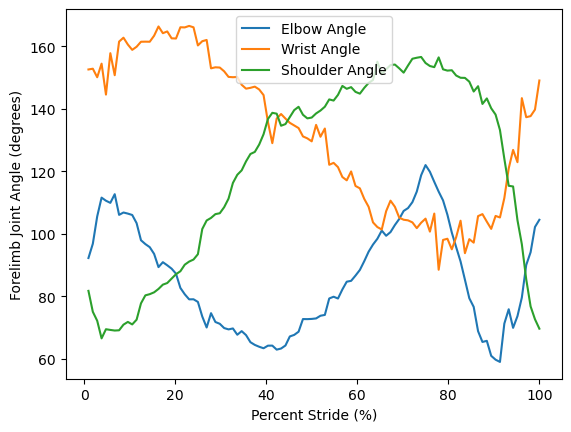

In [46]:
plt.figure(1)

plt.plot(p_stride1, elbow, label='Elbow Angle')
plt.plot(p_stride1, wrist, label='Wrist Angle')
plt.plot(p_stride1, shoulder, label='Shoulder Angle')
plt.xlabel('Percent Stride (%)')
plt.ylabel('Forelimb Joint Angle (degrees)')
plt.legend()
plt.show()

Vector Based 3D Joint Angle Calculations

Note: these calculations are used to varify the trig based calculations are correct
The results from vector based joint calculations will be (should be) identical to those performed via trig. in the section above, just cross varifying with matrix math. Here's a resource to understand the matrix math operations.
Forelimb Elbow Joint
A = shoulder point (X, Y, Z) = [pt4_X, pt4_Y, pt4_Z]
B = elbow point (X, Y, Z) = [pt2_X, pt2_Y, pt2_Z]
C = wrist point (X, Y, Z) = [pt3_X, pt3_Y, pt3_Z]

In [47]:
#np.array creates teh array and .T trsnaposes the original array  

A = np.array([pt4_X_s1, pt4_Y_s1, pt4_Z_s1]).T  #% shoulder
#A = np.transpose(A)
display(A)
B = np.array([pt2_X_s1, pt2_Y_s1, pt2_Z_s1]).T   #% elbow
print(B.shape)
C = np.array([pt3_X_s1, pt3_Y_s1, pt3_Z_s1]).T   #% wrist

print(C.shape)

array([[-5.2286100e-01, -8.8257374e+01,  6.9400749e+01],
       [-9.2828800e-01, -8.8004321e+01,  6.9474571e+01],
       [-6.0572100e-01, -8.8282306e+01,  6.9604593e+01],
       [-3.5213500e-01, -8.7894986e+01,  6.9719498e+01],
       [ 3.8089000e-02, -8.7758753e+01,  6.9806543e+01],
       [ 3.8401500e-01, -8.7411999e+01,  6.9850135e+01],
       [ 5.6925000e-01, -8.7152653e+01,  6.9881691e+01],
       [ 7.7532700e-01, -8.6853688e+01,  6.9914610e+01],
       [ 9.6725000e-01, -8.6703291e+01,  6.9932038e+01],
       [ 1.2037010e+00, -8.6556733e+01,  6.9949449e+01],
       [ 1.3244840e+00, -8.6046535e+01,  6.9976296e+01],
       [ 1.5206080e+00, -8.5942364e+01,  6.9973351e+01],
       [ 2.1663850e+00, -8.5657784e+01,  6.9762369e+01],
       [ 2.3687480e+00, -8.5527776e+01,  6.9655750e+01],
       [ 2.5368140e+00, -8.5201793e+01,  6.9595832e+01],
       [ 2.6517670e+00, -8.4972377e+01,  6.9523754e+01],
       [ 2.7972020e+00, -8.4697152e+01,  6.9453458e+01],
       [ 2.9406680e+00, -8.4322

(104, 3)
(104, 3)


Example Calculation 1
Determining the 2 vectors to characterize the 3D angle by making the elbow (or joint of interest) the origin. The elbow pt is set as the origin for the two vectors by subtracting the elbow point from the should and wrist point.

In [48]:
A0 = A - B #% vector from elbow (origin) to shoulder
#print(A0.shape)
B0 = B - B  #% origin (0,0,0)
#print(B0)
C0 = C - B  #% vector from elbow (origin) to wrist
print(C0)

[[ 7.359145  1.229321  1.421577]
 [ 7.262744  0.811466  1.498801]
 [ 7.102195  1.321739  1.787721]
 [ 6.956483  1.757861  2.031042]
 [ 6.78121   1.587561  1.893653]
 [ 6.800913  1.530233  2.191234]
 [ 6.845144  1.875881  2.348347]
 [ 6.498911  1.007714  2.33654 ]
 [ 6.442032  1.178365  2.417951]
 [ 6.39652   1.25645   2.502799]
 [ 6.394268  1.236747  2.590967]
 [ 6.495134  1.118409  2.664395]
 [ 6.537219  0.908639  2.754079]
 [ 6.55083   0.89176   2.834901]
 [ 6.539705  0.876223  2.901386]
 [ 6.460183  0.578674  2.971921]
 [ 6.521226  0.176208  3.005227]
 [ 6.454194  0.44558   3.073681]
 [ 6.532978  0.371677  3.050894]
 [ 6.531019  0.463235  3.088511]
 [ 6.5379    0.456849  3.119043]
 [ 6.558289 -0.033319  3.160248]
 [ 6.555536 -0.050476  3.236952]
 [ 6.465841 -0.158745  3.321142]
 [ 6.26876  -0.163027  3.395627]
 [ 6.560975 -0.268668  3.955042]
 [ 6.274513 -0.265024  3.851366]
 [ 6.408906 -0.398896  3.944015]
 [ 6.090935  0.175239  4.070422]
 [ 6.083059  0.074444  4.085808]
 [ 6.01774

Calculating the angle between two vectors, using the following formula,
    a • b=a *b * cos (a) 

Which can be re-arranged to,
    a = arccos {(a • b)/ |a| * |b|}.


Using the algebraic formula for the dot product (the sum of the products of the vectors' components), and substitute in the magnitudes, the equation is:
    a = arccos((x_a * x_b+ y_a * y_b + z_a + z_b)/ √(x_a^2 + y_a^2 + z_a^2) * √x_b^2+y_b^2 +zb^2) 

In [49]:
dot_product = (A0[:,0] * C0[:,0]) + (A0[:,1] * C0[:,1]) + (A0[:,2] * C0[:,2])  #this gives the right results

# Calculate the magnitudes of A0 and C0 vectors
mag_A0 = np.sqrt(A0[:,0]**2 + A0[:,1]**2 + A0[:,2]) #in the matlab it does not have the ** (.^2)which gives different result, however based on the equation, there should be a **
mag_C0 = np.sqrt(C0[:,0]**2 + C0[:,1]**2 + C0[:,2]**2)

# Calculate the cosine of the angle between A0 and C0 vectors
cos_angle = dot_product / (mag_A0 * mag_C0)

# Calculate the angle in degrees using arccosine
alpha = np.degrees(np.arccos(cos_angle) )
#alpha = np.degrees(alpha_)

display(alpha)
print(alpha.shape)


array([ 92.22454677,  96.85646946, 105.72383004, 111.86457654,
       110.8773086 , 110.27157918, 113.21584475, 106.41022779,
       107.23598658, 106.92232275, 106.52732581, 103.83291162,
        98.22525994,  96.96903409,  95.96741795,  93.70496858,
        89.27434753,  90.93181705,  89.88091465,  88.7319311 ,
        86.98554527,  82.15425761,  79.97214639,  78.21557933,
        78.22385451,  77.2873333 ,  72.02296294,  68.2567072 ,
        73.28566788,  70.5273672 ,  69.98495179,  68.72301442,
        68.28204157,  68.08642644,  65.97443398,  67.34678168,
        66.13088604,  63.90677595,  63.24071785,  62.77325694,
        62.42440686,  63.36083441,  63.54771026,  62.38380315,
        62.93668218,  63.97721621,  66.7740031 ,  67.3016337 ,
        68.33291414,  72.47787616,  72.49615256,  72.59109921,
        72.77227979,  73.6435388 ,  73.93064626,  79.23216639,
        79.80718391,  79.25987727,  82.15739894,  84.64917451,
        84.91662741,  86.59862688,  88.40876416,  91.20

(104,)


Example Calculation 2
Another way to perform this calculation, after determining the two vectors from their start and end point. Find the dot product of the two vectors

Finding the total length of the array allows us to calculate the dot product throughout the array.


//WILL LEAVE THIS HERE BC ITS NOT USED IN THE MATLAB SCRIPT BUT JUST IN CASE WE USE IT IN THE FUTURE 

    %[length,~] = size(A0);
    %c = dot(A0,C0,length);

Calculating the sum across the x, y, z pts/matrix rows to find the dot product. 2 sums across successive elements across rows.
    %VaVb_dotprod = sum(c,2);

Or, it might be best to perform the dot product as such


In [50]:
VaVb_dotprod = np.sum(A0 * C0, axis=1) 
display(VaVb_dotprod.shape)

(104,)

Next determine the magnitude of the vectors

    |Va| = √(Xa^2 + ya^2 + za^2)
    |Vb| = √(Xb^2 + yb^2 + zb^2)

In [51]:
A0_mag = np.sqrt(A0[:,0]**2+A0[:,1]** 2+A0[:,2]) #SHOULDNT TIS BE **2 ? BASED ON THE EQUATION
C0_mag = np.sqrt(C0[:,0]**2+C0[:,1]**2+C0[:,2]**2)

Finally, use the transformed dot product equation:

In [52]:
alpha2 = np.degrees(np.arccos(VaVb_dotprod/(A0_mag*C0_mag)))


Example Calculation 3
Setting up your two vectors, one originating from the elbow to the shoulder and the other originating from the elbow to the wrist.


Where,
Va = vector from the elbow to the shoulder (pt 4 and pt 3)
Vb = vector from the elbow to the wrist (pt 4 and pt 5).

In [53]:
Va = A-B;   #  shoulder pt minus elbow pt; vector from shoulder to elbow
display(Va)
Vb = C-B;   # wrist pt minus elbow pt; vector from wrist to elbow
display(Vb)

array([[ 1.15351 , -8.533748, -0.373201],
       [ 0.086895, -9.053804, -0.870691],
       [-0.649837, -9.117292, -0.93158 ],
       [-0.977304, -8.707245, -1.017399],
       [-1.023233, -9.294346, -1.159606],
       [-0.884548, -8.914484, -1.295688],
       [-0.843683, -8.626311, -1.423428],
       [-0.797395, -9.157306, -1.519481],
       [-0.625211, -8.989687, -1.586728],
       [-0.399141, -8.826539, -1.647921],
       [-0.2848  , -8.309892, -1.652453],
       [-0.033235, -8.304744, -1.666409],
       [ 0.651086, -8.215399, -1.854516],
       [ 0.862799, -8.094399, -1.917193],
       [ 1.019878, -7.776635, -1.943684],
       [ 1.054952, -7.838356, -1.974337],
       [ 1.260673, -7.961824, -2.028621],
       [ 1.337078, -7.316902, -2.023601],
       [ 1.369479, -7.255447, -2.012971],
       [ 1.617493, -6.841238, -2.037228],
       [ 1.818315, -6.364356, -2.088764],
       [ 2.051178, -6.825429, -2.135106],
       [ 2.322981, -6.622666, -2.107214],
       [ 2.472753, -6.454   , -2.1

array([[ 7.359145,  1.229321,  1.421577],
       [ 7.262744,  0.811466,  1.498801],
       [ 7.102195,  1.321739,  1.787721],
       [ 6.956483,  1.757861,  2.031042],
       [ 6.78121 ,  1.587561,  1.893653],
       [ 6.800913,  1.530233,  2.191234],
       [ 6.845144,  1.875881,  2.348347],
       [ 6.498911,  1.007714,  2.33654 ],
       [ 6.442032,  1.178365,  2.417951],
       [ 6.39652 ,  1.25645 ,  2.502799],
       [ 6.394268,  1.236747,  2.590967],
       [ 6.495134,  1.118409,  2.664395],
       [ 6.537219,  0.908639,  2.754079],
       [ 6.55083 ,  0.89176 ,  2.834901],
       [ 6.539705,  0.876223,  2.901386],
       [ 6.460183,  0.578674,  2.971921],
       [ 6.521226,  0.176208,  3.005227],
       [ 6.454194,  0.44558 ,  3.073681],
       [ 6.532978,  0.371677,  3.050894],
       [ 6.531019,  0.463235,  3.088511],
       [ 6.5379  ,  0.456849,  3.119043],
       [ 6.558289, -0.033319,  3.160248],
       [ 6.555536, -0.050476,  3.236952],
       [ 6.465841, -0.158745,  3.3

Calculating the dot product

Dot product squares v's and take the same across the matrix

One way to calculate the dot product of the two vectors

In [54]:
dot_V = np.sum(Va * Vb, axis=1)

print(dot_V)


[-2.53240223e+00 -8.02075052e+00 -1.83313546e+01 -2.41711052e+01
 -2.38899905e+01 -2.24961272e+01 -2.52997674e+01 -1.79604727e+01
 -1.84573923e+01 -1.77676333e+01 -1.63797727e+01 -1.39439380e+01
 -8.31602373e+00 -7.00126403e+00 -5.78374274e+00 -3.58824344e+00
  7.21729860e-01 -8.50408333e-01  1.08732258e-01  1.10277554e+00
  2.46546723e+00  6.93217012e+00  8.74172069e+00  1.00344914e+01
  9.77263119e+00  1.12159273e+01  1.49626935e+01  1.85521664e+01
  1.37705796e+01  1.62281635e+01  1.67321131e+01  1.78270761e+01
  1.75120677e+01  1.85233350e+01  1.98268334e+01  1.80908623e+01
  1.86398043e+01  2.00645864e+01  2.10176543e+01  2.10969271e+01
  2.11169739e+01  2.10410460e+01  2.27846967e+01  2.22560587e+01
  2.21247692e+01  2.07985452e+01  1.79244703e+01  1.74461777e+01
  1.65807315e+01  1.26608466e+01  1.30519604e+01  1.31843913e+01
  1.31803271e+01  1.26933692e+01  1.26131854e+01  8.30144370e+00
  7.94150886e+00  8.97945315e+00  6.54893159e+00  4.49999799e+00
  4.23018490e+00  2.87346

Characterizing the vector magnitude for Va and Vb

In [55]:
sv_Va = Va*Va
dp_Va = np.sum((sv_Va), axis=1)
mag_Va = np.sqrt(dp_Va)

sv_Vb = Vb*Vb
dp_Vb = np.sum((sv_Vb), axis=1)
mag_Vb = np.sqrt(dp_Vb)

In [56]:
#Solving for theta:
theta_e = np.degrees(np.arccos(dot_V /(mag_Va *mag_Vb)))
display(theta_e)

array([ 92.21685726,  96.78832364, 105.55105191, 111.55961922,
       110.56719547, 109.88435701, 112.6612903 , 106.03427944,
       106.79532167, 106.44557658, 106.00142427, 103.38948601,
        97.91224152,  96.68325829,  95.69906166,  93.53725787,
        89.30736252,  90.88253458,  89.88724897,  88.80742327,
        87.19482578,  82.64673005,  80.60931021,  78.98573794,
        79.0065194 ,  78.16253095,  73.48656559,  69.97224358,
        74.55471769,  71.72694478,  71.15380408,  69.78753483,
        69.36351553,  69.66289227,  67.64991788,  68.8054588 ,
        67.53104577,  65.25939624,  64.39737519,  63.80069084,
        63.32067845,  64.14906534,  64.1683616 ,  62.88004691,
        63.2351252 ,  64.2011137 ,  67.10382174,  67.60001864,
        68.62062595,  72.67184497,  72.64899862,  72.71840857,
        72.87626671,  73.73401298,  73.99868071,  79.26596273,
        79.82311136,  79.25146944,  82.1458373 ,  84.63998938,
        84.90640789,  86.59133042,  88.40548822,  91.20

Hindlimb Knee Joint

Points to generate vectors
D = hip point (X, Y, Z) = [pt7_X, pt7_Y, pt7_Z]
E = knee point (X, Y, Z) = [pt5_X, pt5_Y, pt5_Z]
F = ankle point (X, Y, Z) = [pt6_X, pt6_Y, pt6_Z]

In [57]:
D = np.array([pt7_X_s1, pt7_Y_s1, pt7_Z_s1]).T  #hip
display(D)
E = np.array([pt5_X_s1, pt5_Y_s1, pt5_Z_s1]).T    #knee
display(E)
F = np.array([pt6_X_s1, pt6_Y_s1, pt6_Z_s1]).T    #ankle
print(F)

array([[-1.9133468e+01, -9.3548184e+01,  6.8225941e+01],
       [-1.9065966e+01, -9.2961669e+01,  6.8260213e+01],
       [-1.8881541e+01, -9.2672935e+01,  6.8268407e+01],
       [-1.8702900e+01, -9.3430677e+01,  6.8242781e+01],
       [-1.8535433e+01, -9.2364277e+01,  6.8263674e+01],
       [-1.8184621e+01, -9.2286009e+01,  6.8251646e+01],
       [-1.7962225e+01, -9.2094944e+01,  6.8244504e+01],
       [-1.7818587e+01, -9.1989322e+01,  6.8210787e+01],
       [-1.7373591e+01, -9.1485396e+01,  6.8318121e+01],
       [-1.7125702e+01, -9.1499817e+01,  6.8335968e+01],
       [-1.7044365e+01, -9.1492501e+01,  6.8340824e+01],
       [-1.6937270e+01, -9.1479834e+01,  6.8333285e+01],
       [-1.6819067e+01, -9.1181291e+01,  6.8330538e+01],
       [-1.6361603e+01, -9.0654765e+01,  6.8520466e+01],
       [-1.6105506e+01, -9.0658870e+01,  6.8497055e+01],
       [-1.5914339e+01, -9.0275933e+01,  6.8491467e+01],
       [-1.5739506e+01, -9.0079271e+01,  6.8469827e+01],
       [-1.5595301e+01, -8.9685

array([[-21.635002, -86.504953,  71.689197],
       [-21.429694, -86.3303  ,  71.67157 ],
       [-21.419533, -86.22027 ,  71.690631],
       [-21.195417, -85.95518 ,  71.714751],
       [-21.002343, -86.632637,  71.717805],
       [-21.166638, -85.715547,  71.737511],
       [-20.8209  , -85.937515,  71.715602],
       [-20.712502, -85.644907,  71.698466],
       [-20.664154, -85.348748,  71.670293],
       [-20.573188, -85.344485,  71.626284],
       [-20.598999, -84.573645,  71.652372],
       [-20.522117, -84.860276,  71.630096],
       [-20.466496, -84.753147,  71.613505],
       [-20.339872, -84.275765,  71.615392],
       [-20.165752, -84.000658,  71.605293],
       [-20.126963, -84.550218,  71.536008],
       [-20.262992, -83.926792,  71.499197],
       [-20.051549, -84.130947,  71.472763],
       [-20.179862, -83.890394,  71.477664],
       [-19.619519, -83.677191,  71.490392],
       [-19.618834, -83.836046,  71.464948],
       [-19.423646, -83.833155,  71.410279],
       [-1

[[-26.211029 -94.818609  67.517125]
 [-26.125812 -94.485758  67.530907]
 [-25.853843 -94.338978  67.526512]
 [-25.730645 -94.329501  67.515405]
 [-25.645821 -94.308649  67.500478]
 [-25.38228  -93.81121   67.482901]
 [-25.231981 -93.798232  67.470261]
 [-25.146529 -93.786309  67.46166 ]
 [-25.093019 -93.778516  67.45472 ]
 [-25.041082 -93.771446  67.450169]
 [-25.006446 -93.766852  67.447655]
 [-24.811795 -93.277121  67.463049]
 [-24.695806 -93.703355  67.449184]
 [-24.605302 -93.692777  67.449038]
 [-24.515287 -93.682811  67.451252]
 [-24.456704 -93.676534  67.45355 ]
 [-24.40088  -93.670089  67.453582]
 [-24.352599 -93.49162   67.459224]
 [-24.245092 -92.73003   67.481309]
 [-24.042267 -92.748847  67.473119]
 [-23.989491 -92.738814  67.455254]
 [-23.940796 -92.726353  67.424213]
 [-23.906159 -92.455013  67.395764]
 [-23.700572 -92.216618  67.374127]
 [-23.667303 -92.205291  67.373132]
 [-23.612317 -92.200725  67.381012]
 [-23.472278 -91.707517  67.41952 ]
 [-23.273576 -92.156234  67.

Generating Vectors

Vc = vector from the knee to the hip (pt 8 and pt 7)
Vd = vector from the knee to the ankle (pt 8 and pt 9)

In [58]:
Vc = D-E    # pt6- pt7; vector from hip to knee
Vd = F-E    # pt8-pt7; vector from ankle to knee

Calculating the dot product for vectors Vc and Vd

In [59]:
VcVd_dotprod = np.sum(Vc*Vd,axis=1)
display(VcVd_dotprod)

array([61.55686592, 57.10678546, 55.38360763, 65.87808196, 47.10829503,
       55.45212608, 50.52795449, 53.59735504, 51.28838541, 50.20847869,
       61.86373662, 54.07592073, 55.77844633, 55.99664893, 59.71739329,
       46.44432433, 53.48341646, 44.93406687, 42.40464381, 45.70452686,
       42.95080045, 42.65740673, 38.20917845, 32.81226718, 37.19548316,
       43.28062876, 30.86564649, 31.60632274, 28.05961512, 29.64228885,
       24.04106919, 25.07122045, 20.91058068, 20.01460371, 18.50165936,
       17.08211394, 13.35949773, 12.8495149 , 16.37942237, 14.27368927,
       17.02990949, 12.71004394, 10.18066129, 18.86897354, 20.2024326 ,
       24.78725023, 32.56108322, 41.15239692, 44.88678118, 38.48832716,
       56.82523856, 62.09819296, 62.42782622, 62.99238652, 61.22516528,
       54.41998799, 48.69168224, 52.76629572, 50.41751266, 46.6306428 ,
       56.58808796, 50.44117723, 44.88021551, 47.05876956, 46.4623765 ,
       41.04245912, 33.86055636, 29.58031562, 25.53845425, 27.65

Next determine the magnitude of the vectors
    |Vc| = √(xc^2 + yc^2 + zc^2)
    |Vc| = √(xd^2 + yd^2 + zd^2)

In [60]:
Vc_mag = np.sqrt(Vc[:,0]**2+Vc[:,1]**2+Vc[:,2]) #missing the **2 at the end?
Vd_mag = np.sqrt(Vd[:,0]**2+Vd[:,1]**2+Vd[:,2]**2)

In [61]:
#Finally, use the transformed dot product equation:
    
beta = np.degrees(np.arccos(VcVd_dotprod/(Vc_mag*Vd_mag)))

Old Way
Calculating the dot product; squares v's and take the same across the matrix

In [62]:
dot_V = np.sum((Vc*Vd), axis=1)

Calculating the product of the vector magnitude

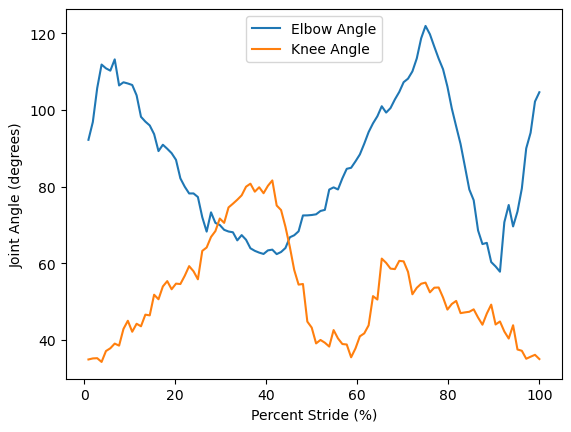

In [63]:
sv_Vc = Vc*Vc
dp_Vc = np.sum((sv_Vc), axis=1)
mag_Vc = np.sqrt(dp_Vc)
sv_Vd = Vd*Vd
dp_Vd = np.sum((sv_Vd),axis=1)
mag_Vd = np.sqrt(dp_Vd)
theta_k = np.degrees(np.arccos(dot_V/(mag_Vc*mag_Vd)))

#% Graphing FL & HL 3D Joint Angles (using matrix math)

#% Displaying |elbow| and |knee| angle over time.

#this figure has been comented out in matlab but it appears to be okay here 
plt.figure(2)
plt.plot(p_stride1,alpha2,p_stride1, beta)
plt.xlabel('Percent Stride (%)')
plt.ylabel('Joint Angle (degrees)')
plt.legend(['Elbow Angle','Knee Angle'])
plt.show()

Finding Angle Measurements in the Hindlimb

In this section we use the distance formula defined in the forelimb joint angle section to calculate hindlimb joint angles. Here, k will indicate knee angle, h will indicate hip angle, and a will indicate ankle angle.

Distance Between Hip and Knee (d_hk)

In [64]:
d_hk = np.sqrt((pt7_X_s1-pt5_X_s1)**2+(pt7_Y_s1-pt5_Y_s1)**2+(pt7_Z_s1-pt5_Z_s1)**2)
display(d_hk)

31     8.237652
32     7.823019
33     7.732393
34     8.611055
35     7.132206
         ...   
130    8.931737
131    9.381082
132    9.741777
133    9.672587
134    9.809412
Length: 104, dtype: float64

Distance Between Knee and Ankle (d_ka)

In [65]:
d_ka = np.sqrt((pt6_X_s1-pt5_X_s1)**2+(pt6_Y_s1-pt5_Y_s1)**2+(pt6_Z_s1-pt5_Z_s1)**2)
display(d_ka)

31     10.366440
32     10.281542
33     10.144773
34     10.408268
35      9.913067
         ...    
130    10.224131
131    10.456370
132    10.393101
133    10.616964
134    10.635484
Length: 104, dtype: float64

Distance Between Hip and Ankle (d_ha)

In [66]:
d_ha = np.sqrt((pt7_X_s1-pt6_X_s1)**2+(pt7_Y_s1-pt6_Y_s1)**2+(pt7_Z_s1-pt6_Z_s1)**2)
display(d_ha)

31     7.225529
32     7.259212
33     7.206879
34     7.122230
35     7.410848
         ...   
130    7.997955
131    7.979413
132    8.004354
133    8.184922
134    8.080082
Length: 104, dtype: float64

Distance Between Ankle and Phalange (TMT joint) (d_ap)


In [67]:
d_ap = np.sqrt((pt9_X_s1-pt6_X_s1)**2+(pt9_Y_s1-pt6_Y_s1)**2+(pt9_Z_s1-pt6_Z_s1)**2)
display(d_ap)

31      8.943290
32      9.097135
33      9.206770
34      9.785264
35      9.583385
         ...    
130    10.273080
131    10.290789
132    10.231326
133    10.318578
134    10.410991
Length: 104, dtype: float64

Distance Between Knee and Phalange (TMT joint) (d_kp)


In [68]:
d_kp = np.sqrt((pt9_X_s1-pt5_X_s1)**2+(pt9_Y_s1-pt5_Y_s1)**2+(pt9_Z_s1-pt5_Z_s1)**2)
display(d_kp)

31      9.240430
32      9.570817
33      9.449750
34      9.586153
35      9.684376
         ...    
130    10.316336
131    10.572523
132    10.802764
133    11.054771
134    11.353283
Length: 104, dtype: float64

Distance Between Knee and Shoulder (d_ks)

In [69]:
d_ks = np.sqrt((pt4_X_s1-pt5_X_s1)**2+(pt4_Y_s1-pt5_Y_s1)**2+(pt4_Z_s1-pt5_Z_s1)**2)
display(d_ks)

31     21.307991
32     20.686633
33     21.019475
34     21.028226
35     21.157052
         ...    
130    22.232118
131    21.952789
132    22.204738
133    22.730382
134    22.715205
Length: 104, dtype: float64

d_he distance between hip and shoulder has been previously defined for the forelimband can be used to calculate the hip angle here.

The following equations were used to calculate the hindlimb joint angles:

    adj_h = arccos((d_hs^2 + d_hk^2 - d_ks^2)/ 
    (2 * d_hs * d_hk))

    K = arccos((d_ka^2 + d_hk^2 - d_ha^2)/ 
    (2 * d_ka * d_hk))

    A = arccos((d_ka^2 + d_ap^2 - d_kp^2)/ 
    (2 * d_ka * d_ap))


Note: the hip was calculated from the adjacent angle created from the shoulder, knee, and ankle points.


In [70]:
adj_hip = np.degrees(np.arccos((d_hs**2 + d_hk**2 - d_ks**2) / (2 * d_hs * d_hk)))
display(adj_hip)
hip = 180-adj_hip
display(hip)
knee = np.degrees(np.arccos((d_hk**2 + d_ka**2 - d_ha**2) / (2 * d_hk * d_ka)))
display(knee)
ankle = np.degrees(np.arccos(((d_ka**2 + d_ap**2 - d_kp**2) / (2 * d_ka * d_ap))))
display(ankle)                 

31     91.874121
32     92.276818
33     95.308364
34     89.733644
35     95.907523
         ...    
130    77.383071
131    76.773431
132    76.986756
133    77.857328
134    76.800924
Length: 104, dtype: float64

31      88.125879
32      87.723182
33      84.691636
34      90.266356
35      84.092477
          ...    
130    102.616929
131    103.226569
132    103.013244
133    102.142672
134    103.199076
Length: 104, dtype: float64

31     43.875505
32     44.765519
33     45.086943
34     42.690103
35     48.218377
         ...    
130    48.783552
131    47.051061
132    46.709870
133    47.299729
134    46.340316
Length: 104, dtype: float64

31     56.603799
32     58.813378
33     58.219024
34     56.580195
35     59.538497
         ...    
130    60.437154
131    61.266748
132    63.167229
133    63.727311
134    65.280697
Length: 104, dtype: float64

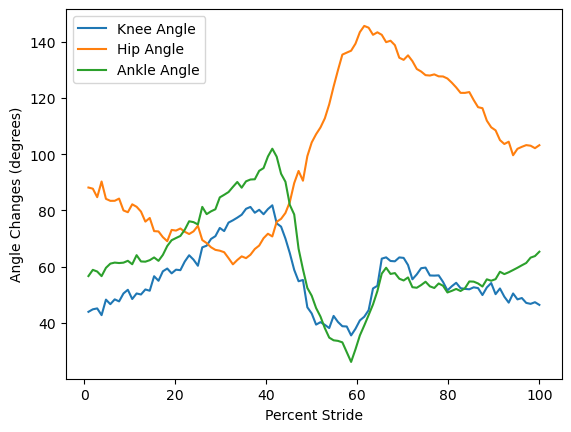

"saving graph as vector image\n%    graphname4 = append(walk_seq, '_HLjointgraph.pdf');\n%    ax1 = gca;\n%    exportgraphics(ax1, graphname4,'ContentType','vector');"

In [71]:
# Graphing HL 3D Joint Angles (using trig)
# *TODO graph for only contact time/period*

plt.figure(3)
plt.plot(p_stride1,knee,p_stride1, hip,p_stride1,ankle)
plt.xlabel('Percent Stride')
plt.ylabel('Angle Changes (degrees)')
plt.legend({'Knee Angle','Hip Angle','Ankle Angle'})
plt.show()
   


Analysing Force Plate Data

This code analyzes the ground reaction force data that was taken as the frogs walked across a force plate.

Conversion from video time to ground reaction force time

Finding where the force data is based upon the tiggered video time calculated in the above section.
If else statements are used to address issues with data wrap around. For example, if the trigger occurs earlier in the data sequence than the forces/stride sequence this suggests the data has wrapped around in time.
Executes the following, if trigger occurs before s1_start in force time, if not, executes else function

In [72]:
#POTENTIAL ISSUE: start startf_s1_sec is at 97 rn bc -1 but it makes delta_s1_start be slighty diff. from 2.3200(matlab) to 2.3240 python, not sure how itll affect 
if trigger_t < delta_s1_start: #for 20210709_pb2_walk2_xyzpts.csv it starts at 31 frames (32 in matlab). Here its were results strat changing between matlab and python
    s1_start_force_t = trigger_t-delta_s1_start+(igor_sr/1000) #delta_s1_start has the wrong result
else:
    s1_start_force_t = trigger_t-delta_s1_start
    
print(s1_start_force_t, trigger_t, delta_s1_start)
    

2.7435000000000005 4.6435 1.9


Executes the following, if trigger occurs before s1_end in force time, if not, executes else function

In [73]:
if trigger_t < delta_s1_end: 
    s1_end_force_t = trigger_t-delta_s1_end+(igor_sr/1000)
else:
    s1_end_force_t = trigger_t-delta_s1_end

print(s1_end_force_t, trigger_t, delta_s1_end) #delta_s1_end is 1.5320 (matlab), makes s1_end_force_t be different to 9.3394


#is commented out in matlab code
"""% % executes the following if only trigger is wrapped around
% if trigger_t < delta_s1_start %&& trigger_t < delta_s1_end
%
%
% % executes the following if only trigger and part of the start force wrap around
% elseif trigger_t < delta_s1_start && trigger_t < delta_s1_end %||
%     s1_start_force_t = trigger_t-delta_s1_start+(igor_sr/1000);
%     s1_end_force_t = trigger_t-delta_s1_end;
% % executes if trigger is not wrapped around and all the force data is
% % inline  Ideal one to use
% else
%
%
% end""" 

3.1555000000000004 4.6435 1.488


'% % executes the following if only trigger is wrapped around\n% if trigger_t < delta_s1_start %&& trigger_t < delta_s1_end\n%\n%\n% % executes the following if only trigger and part of the start force wrap around\n% elseif trigger_t < delta_s1_start && trigger_t < delta_s1_end %||\n%     s1_start_force_t = trigger_t-delta_s1_start+(igor_sr/1000);\n%     s1_end_force_t = trigger_t-delta_s1_end;\n% % executes if trigger is not wrapped around and all the force data is\n% % inline  Ideal one to use\n% else\n%\n%\n% end'

Executes the following, if trigger occurs before fl_end in force time, if not, executes else function

In [74]:
if trigger_t < delta_fl_end: 
    fl_end_force_t = trigger_t-delta_fl_end+(igor_sr/1000)
else:
    fl_end_force_t = trigger_t-delta_fl_end
    
print(fl_end_force_t, trigger_t, delta_fl_end)#this are the same results as matlab 

3.0835000000000004 4.6435 1.56


Executes the following, if trigger occurs before fl_only_end in force time, if not, executes else function

In [75]:
if trigger_t < delta_fl_only_end:
    fl_only_end_force_t = trigger_t-delta_fl_only_end+(igor_sr/1000)
else:
    fl_only_end_force_t = trigger_t-delta_fl_only_end
    
print(fl_only_end_force_t, trigger_t, delta_fl_only_end, igor_sr) #same as matlab


3.0075000000000003 4.6435 1.6360000000000001 10000


Executes the following. If the trigger occurs before hl_only_starts when is in contact, if not, execute else function

In [76]:
if trigger_t < delta_hl_only_start:
    hl_start_force_t_only = trigger_t-delta_hl_only_start+(igor_sr/1000)
    #%elseif delta_hl_only_start < delta_s1_start
    #%    hl_start_force_t_only = trigger_t-delta_hl_only_start+(igor_sr/1000);
else:
    hl_start_force_t_only = trigger_t-delta_hl_only_start

print(hl_start_force_t_only, trigger_t, delta_hl_only_start) #same as matlab

3.0875000000000004 4.6435 1.556


Executes the following, if trigger occurs before hl_on in force time, if not, executes else function

In [77]:
if trigger_t < delta_hl_on:
    hl_on_force_t = trigger_t-delta_hl_on+(igor_sr/1000)
else:
    hl_on_force_t = trigger_t-delta_hl_on
    
print(hl_on_force_t, trigger_t, delta_hl_on) #same as matlab


3.0115000000000003 4.6435 1.6320000000000001


Executes the following, if trigger occurs before hl_end in force time, if not, executes else funtion

In [78]:
if trigger_t < delta_hl_end:
    hl_end_force_t = trigger_t-delta_hl_end+(igor_sr/1000)
else:
    hl_end_force_t = trigger_t-delta_hl_end

print(hl_end_force_t, trigger_t, delta_hl_end)#same as matlab     

3.4195 4.6435 1.224


Executes the following, if trigger occurrs before start of stride 2, if not, executes else function

In [79]:
if endf_s2_sec != 0 or startf_s2_sec != 0:
    if trigger_t < delta_s2_start:
        s2_start_force_t = trigger_t-delta_s2_start+(igor_sr/1000)
    else:
        s2_start_force_t = trigger_t-delta_s2_start
        
print(s2_start_force_t, trigger_t, delta_s2_start) #not same as mathlab, 3.1595 python, 3.1635 mathlab   for 20210709_pb2_walk2_xyzpts.csv


3.1595000000000004 4.6435 1.484


Executes the following, if trigger occurs before end of stride 2, if not, executes else function

In [80]:
#CHECK AGAIN WITH HL INFO
if endf_s2_sec != 0:
    if trigger_t < delta_s2_end:
        s2_end_force_t = trigger_t-delta_s2_end+(igor_sr/1000)
    else:
        s2_end_force_t = trigger_t-delta_s2_end
    print(delta_s2_end)   
    print(s2_end_force_t, trigger_t, delta_s2_end) #for 20210709_pb2_walk2_xyzpts.csv, delta_s2_end 1.056 pyhton, 1.0520 matlab
 

1.052
3.5915000000000004 4.6435 1.052


Finding the column in the igor file that each event corresponds to:

Note: 10,000 corresponds to the sampling rate in Igor, 10,000 samples/sec

In [81]:
#%I think thsi tod is not necessary now - TODO this might be our issue I think jenifer added this in there?
fl_only_end_force_c = np.round(fl_only_end_force_t *10000,4)
print("fl_only_end_force_c", fl_only_end_force_c)
hl_only_start_force_c = np.round(hl_start_force_t_only *10000,4)
print("hl_only_start_force_c", hl_only_start_force_c)
s1_start_force_c = np.round(s1_start_force_t*10000,4)
print("s1_start_force_c", s1_start_force_c, s1_start_force_t) #this is not the same as matlab(85514)
s1_end_force_c = np.round(s1_end_force_t*10000,4)
print("s1_end_force_c" ,s1_end_force_c) #this is not the same as matlab(93394)
fl_end_force_c = np.round(fl_end_force_t*10000,4)
print("fl_end_force_c", fl_end_force_c)
hl_on_force_c = np.round(hl_on_force_t*10000,4)
print("hl_on_force_c", hl_on_force_c)
hl_end_force_c = np.round(hl_end_force_t*10000,4)
print("hl_end_force_c", hl_end_force_c)

if startf_s2_sec != 0:
    s2_start_force_c = np.round(s2_start_force_t * 10000,4)

print(s2_start_force_c)



fl_only_end_force_c 30075.0
hl_only_start_force_c 30875.0
s1_start_force_c 27435.0 2.7435000000000005
s1_end_force_c 31555.0
fl_end_force_c 30835.0
hl_on_force_c 30115.0
hl_end_force_c 34195.0
31595.0


In [82]:
#chechk again with HL info
if endf_s2_sec != 0:
    s2_end_force_c = round(s2_end_force_t *10000,4)
    print(s2_end_force_c)

35915.0


Setting up force time for FL and HL

Defining the time scale for force across different events, from:
    stride 1-stride 2
    FL only stride cycle time
    HL only stride cycle time
    Overlapp between FL and HL

Syncronizing force time with video time for FL

In [83]:
fl_only_f_t = np.arange(s1_start_force_c, fl_only_end_force_c + 1)/1000
print(s1_start_force_c, fl_only_end_force_c) # s1_start_force_c is causing the mismatch results 

print(fl_only_f_t.shape) # pyt is 5641 and matlab is 5601, bc it starts at 97 it takes about 40 ore rows bac of the time 
print(fl_only_f_t)
fl_only_f_sec = fl_only_f_t - fl_only_f_t[0] #% time starts at zero

print(fl_only_f_sec.shape)
 # i think its okay that it takes another amount becasue since its 97/250 its only the time that is diffrent 

27435.0 30075.0
(2641,)
[27.435 27.436 27.437 ... 30.073 30.074 30.075]
(2641,)


Syncronizing force time with video time for HL

In [84]:
#check with Hl INFO
if startf_s2_sec != 0 and endf_s2_sec != 0:
    hl_only_f_t = np.arange(hl_only_start_force_c, hl_end_force_c + 1)/1000 #same as matlab
    print(hl_only_f_t.shape)
    hl_only_f_sec = hl_only_f_t - hl_only_f_t[0]  # time starts at zero


(3321,)


Characterizing Percent Stride for force data


In [85]:
f_diff_s1_start = s1_start_force_c - s1_start_force_c + 1
print(f_diff_s1_start)
f_diff_s1_end = s1_end_force_c - s1_start_force_c + 1
print("f_diff_s1_end", f_diff_s1_end)
f_diff_fl_only_end = fl_only_end_force_c - s1_start_force_c + 1
print(f_diff_fl_only_end) #takes 40 sec after matlab so instead of 5601 is 5641
f_diff_hl_start = hl_on_force_c - s1_start_force_c + 1
print(f_diff_hl_start) #takes 40 sec after matlab so instead of 5641 is 5681


#basically this are all different numbers 
if fl_end_force_c < s1_start_force_c:
    f_diff_fl_end = fl_end_force_c + 100000 - s1_start_force_c + 1
    
else:
    f_diff_fl_end = fl_end_force_c - s1_start_force_c + 1
print('f_diff_fl_end',f_diff_fl_end)

if hl_only_start_force_c < s1_start_force_c:
    f_diff_hl_only_start = hl_only_start_force_c + 100000 - s1_start_force_c + 1
else:
    f_diff_hl_only_start = hl_only_start_force_c - s1_start_force_c + 1

print('f_diff_hl_only_start',f_diff_hl_only_start)
if s2_start_force_c < s1_start_force_c:
    f_diff_s2_start = s2_start_force_c + 100000 - s1_start_force_c + 1
else:
    f_diff_s2_start = s2_start_force_c - s1_start_force_c + 1
print("f_diff_s2_start", f_diff_s2_start)

if hl_end_force_c < s1_start_force_c:
    f_diff_hl_end = hl_end_force_c + 100000 - s1_start_force_c + 1
else:
    f_diff_hl_end = hl_end_force_c - s1_start_force_c + 1
print("f_diff_hl_end", f_diff_hl_end)

if HL == 1:
    if s2_end_force_c < s1_start_force_c:
        f_diff_s2_end = s2_end_force_c + 100000 - s1_start_force_c + 1
    else:
        f_diff_s2_end = s2_end_force_c - s1_start_force_c + 1
#print("f_diff_s2_end" ,f_diff_s2_end)

1.0
f_diff_s1_end 4121.0
2641.0
2681.0
f_diff_fl_end 3401.0
f_diff_hl_only_start 3441.0
f_diff_s2_start 4161.0
f_diff_hl_end 6761.0


Define time over 2 strides

size finds the array size from the start of the stride to the end using the first and last frame of the strides

In [86]:
#matches atlab
if HL == 1:
    forcesize = f_diff_s2_end - f_diff_s1_start + 1
elif HL == 0:
    forcesize = f_diff_s1_end - f_diff_s1_start + 1
#print(forcesize)

Calculates the percent stride array use to standardize across different walking trials, changes the time component usually at the x-axis values to plot y-axis variables of interest (e.g. force, torques, etc.) since every stride is going to be a different length in time.

In [87]:
forcestride1 =np.arange(f_diff_s1_start, f_diff_fl_end + 1)
s1_size = len(forcestride1)
print(forcestride1.shape)
print(s1_size)

p_forcestride1 = np.round(forcestride1 / s1_size * 100,4)
print(p_forcestride1)

if HL == 1:   
    forcestride2 = np.arange(f_diff_fl_end + 1,f_diff_s2_end + 1)
    s2_size  = len(forcestride2)
    p_forcestride2 = np.round(forcestride2 / s2_size * 100,4)
    p_forcestrides_all = np.concatenate((p_forcestride1,p_forcestride2))

    print(p_forcestrides_all)
elif HL == 0:
    p_forcestrides_all = p_forcestride1


p_force_flonly = p_forcestrides_all[int(f_diff_s1_start): int(f_diff_fl_only_end + 1)]
print(p_force_flonly)
if HL == 1:
    p_force_hlonly = p_forcestrides_all[int(f_diff_hl_only_start):int(f_diff_hl_end + 1)]


(3401,)
3401
[2.94000e-02 5.88000e-02 8.82000e-02 ... 9.99412e+01 9.99706e+01
 1.00000e+02]
[2.940000e-02 5.880000e-02 8.820000e-02 ... 1.669094e+02 1.669291e+02
 1.669488e+02]
[5.88000e-02 8.82000e-02 1.17600e-01 ... 7.76242e+01 7.76536e+01
 7.76830e+01]


Importing force data set

In [88]:



file = walk_seq + '_force_data.txt'
txt_file = '/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/' + file
display(txt_file)
datavalues_ = pd.read_table(txt_file) #it also works with np.loadtxt but read tablw might be best becaus eit also shows the index to make sure thoese are the right values
datavalues = datavalues_.round(4)
display(datavalues.head())

'/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/20210709_pb2_walk2_force_data.txt'

,Fx_SS,Fy_SS,Fz_SS,Mx,My,Mz,Fr_SS,trigger
0,0.0005,-0.0065,0.007,-0.0003,-0.0020,-0.0001,0.0096,4.2213
1,0.0005,-0.0065,0.007,-0.0002,-0.0019,-0.0001,0.0096,4.2223
2,0.0005,-0.0065,0.007,-0.0002,-0.0020,-0.0000,0.0096,4.2275
3,0.0005,-0.0065,0.007,-0.0002,-0.0019,-0.0000,0.0096,4.2287
4,0.0005,-0.0065,0.007,-0.0003,-0.0019,-0.0001,0.0095,4.2262


Extracting Force Data for Forelimb only data (for trials w/overlap)

If data is wrapped around the if else statements will pull out particular chunks and adds them together using cat().

In [89]:
print(s1_start_force_c, fl_only_end_force_c )


s1_start_force_c = int(s1_start_force_c)
fl_only_end_force_c = int(fl_only_end_force_c)

if trigger_t < delta_s1_start and trigger_t < delta_fl_only_end:
    
    f_x_flonly = datavalues.iloc[s1_start_force_c :fl_only_end_force_c + 1, 0]
    f_y_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 1]
    f_z_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 2]
    m_x_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 3]
    m_y_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 4]
    m_z_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 5]
    f_r_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 6]
    trigger_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 7]
    
    
    #% executes the following section if all data except stride start wraps around
elif trigger_t < delta_s1_start and trigger_t > delta_fl_only_end:   # added && 1/3/21
    f_x1_flonly = datavalues.iloc[s1_start_force_c:, 0]; 
    f_y1_flonly = datavalues.iloc[s1_start_force_c:, 1] 
    f_z1_flonly = datavalues.iloc[s1_start_force_c:, 2]
    m_x1_flonly = datavalues.iloc[s1_start_force_c:, 3]
    m_y1_flonly = datavalues.iloc[s1_start_force_c:, 4]
    m_z1_flonly = datavalues.iloc[s1_start_force_c:, 5]
    f_r1_flonly = datavalues.iloc[s1_start_force_c:, 6]
    trigger1_flonly = datavalues.iloc[s1_start_force_c:, 7]
    
    f_x2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 0]
    f_y2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 1]
    f_z2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 2]
    m_x2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 3]
    m_y2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 4]
    m_z2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 5]
    f_r2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 6]
    trigger2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 7]
    
    f_x_flonly = np.concatenate(1,f_x1_flonly,f_x2_flonly)
    print(f_x_flonly)
    f_y_flonly = np.concatenate(1,f_y1_flonly,f_y2_flonly)
    f_z_flonly = np.concatenate(1,f_z1_flonly,f_z2_flonly)
    m_x_flonly = np.concatenate(1,m_x1_flonly,m_x2_flonly)
    m_y_flonly = np.concatenate(1,m_y1_flonly,m_y2_flonly)
    m_z_flonly = np.concatenate(1,m_y1_flonly,m_y2_flonly)
    f_r_flonly = np.concatenate(1,f_r1_flonly,f_r2_flonly)
    trigger_flonly = np.concatenate(1,trigger1_flonly,trigger2_flonly)
    
    #% executes if data is normal and trigger is at the end of the force trace
elif trigger_t > delta_s1_start and trigger_t > delta_fl_only_end:
    f_x_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 0]
    f_y_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 1]
    f_z_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 2]
    m_x_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 3]
    m_y_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 4]
    m_z_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 5]
    f_r_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 6]
    trigger_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 7]

    
    
display(trigger_flonly.shape)
#print(f_x_flonly, f_x_flonly.shape)
    

27435.0 30075.0


(2641,)

Extracting Force Data for the Hindlimb only data (for trials w/overlap)

If data is wrapped around the if else statements will pull out particular chunks and add them together using cat().

In [90]:
#CHECK WITH HL INFO
hl_only_start_force_c = int(hl_only_start_force_c)
hl_end_force_c = int(hl_end_force_c)

if trigger_t < delta_hl_only_start and trigger_t < delta_hl_end:    
    
    f_x_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 0]
    f_y_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 1]
    f_z_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 2]
    m_x_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 3]
    m_y_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 4]
    m_z_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 5]
    f_r_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 6]
    trigger_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 7]
    
    #% executes the following section if all data except stride start wraps around
elif trigger_t < delta_hl_only_start and trigger_t > delta_hl_end:   # added and 1/3/21
    f_x1_hlonly = datavalues.iloc[hl_only_start_force_c:, 0] 
    f_y1_hlonly = datavalues.iloc[hl_only_start_force_c:, 1]
    f_z1_hlonly = datavalues.iloc[hl_only_start_force_c:, 2]
    m_x1_hlonly = datavalues.iloc[hl_only_start_force_c:, 3]
    m_y1_hlonly = datavalues.iloc[hl_only_start_force_c:, 4]
    m_z1_hlonly = datavalues.iloc[hl_only_start_force_c:, 5]
    f_r1_hlonly = datavalues.iloc[hl_only_start_force_c:, 6]
    trigger1_hlonly = datavalues.iloc[hl_only_start_force_c:, 7]
    
    hl_end_force_c_wrap = hl_end_force_c-(igor_sr)
    
    f_x2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 0]
    f_y2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 1]
    f_z2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 2]
    m_x2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 3]
    m_y2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 4]
    m_z2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 5]
    f_r2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 6]
    trigger2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 7]
    
    f_x_hlonly = np.concatenate(f_x1_hlonly,f_x2_hlonly)
    f_y_hlonly = np.concatenate(f_y1_hlonly,f_y2_hlonly)
    f_z_hlonly = np.concatenate(f_z1_hlonly,f_z2_hlonly)
    m_x_hlonly = np.concatenate(m_x1_hlonly,m_x2_hlonly)
    m_y_hlonly = np.concatenate(m_y1_hlonly,m_y2_hlonly)
    m_z_hlonly = np.concatenate(m_y1_hlonly,m_y2_hlonly)
    f_r_hlonly = np.concatenate(f_r1_hlonly,f_r2_hlonly)
    trigger_hlonly = np.concatenate(trigger1_hlonly,trigger2_hlonly)
    
    # executes if data is normal and trigger is at the end of the force trace
elif trigger_t > delta_hl_only_start and trigger_t > delta_hl_end:
    f_x_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 0]
    f_y_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 1]
    f_z_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 2]
    m_x_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 3]
    m_y_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 4]
    m_z_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 5]
    f_r_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 6]
    trigger_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1,7]


display(f_x_hlonly.shape)

(3321,)

Extracting Force Data for Stride 1

If data is wrapped around the if else statements will pull out particular chunks and add them together using cat().

In [91]:
# if data is normal and only the trigger wraps around, it will execute
# the following section

#CHECK WITH HL INFO
s1_start_force_c = int(s1_start_force_c)
s1_end_force_c = int(s1_end_force_c)

if trigger_t < delta_s1_start and trigger_t < delta_s1_end:
   

    f_x_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 0]
    f_y_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 1]
    f_z_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 2]
    m_x_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 3]
    m_y_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 4]
    m_z_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 5]
    f_r_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 6]
    trigger_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 7]
    
    # executes the following section if all data except stride start wraps around
elif trigger_t < delta_s1_start and trigger_t > delta_s1_end:   # added and 1/3/21
    f_x1_s1 = datavalues.iloc[s1_start_force_c:, 0]
    f_y1_s1 = datavalues.iloc[s1_start_force_c:, 1]
    f_z1_s1 = datavalues.iloc[s1_start_force_c:, 2]
    m_x1_s1 = datavalues.iloc[s1_start_force_c:, 3]
    m_y1_s1 = datavalues.iloc[s1_start_force_c:, 4]
    m_z1_s1 = datavalues.iloc[s1_start_force_c:, 5]
    f_r1_s1 = datavalues.iloc[s1_start_force_c:, 6]
    trigger1_s1 = datavalues.iloc[s1_start_force_c:, 7]
    
    diff_s1_end_force_c = s1_end_force_c-100000
    
    f_x2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 0]
    f_y2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 1]
    f_z2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 2]
    m_x2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 3]
    m_y2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 4]
    m_z2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 5]
    f_r2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 6]
    trigger2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 7]
    
    f_x_s1 = np.concatenate(f_x1_s1,f_x2_s1)
    f_y_s1 = np.concatenate(f_y1_s1,f_y2_s1)
    f_z_s1 = np.concatenate(f_z1_s1,f_z2_s1)
    m_x_s1 = np.concatenate(m_x1_s1,m_x2_s1)
    m_y_s1 = np.concatenate(m_y1_s1,m_y2_s1) 
    m_z_s1 = np.concatenate(m_y1_s1,m_y2_s1)
    f_r_s1 = np.concatenate(f_r1_s1,f_r2_s1)
    trigger_s1 = np.concatenate(trigger1_s1,trigger2_s1)
    
    # executes if data is normal and trigger is at the end of the force trace
elif trigger_t > delta_s1_start and trigger_t > delta_s1_end:
    f_x_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 0]
    f_y_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 1]
    f_z_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 2]
    m_x_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 3]
    m_y_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 4]
    m_z_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 5]
    f_r_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 6]
    trigger_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 7]

print(f_x_s1.shape)

(4121,)


Extracting Force Data for Stride 2

If data is wrapped around the if else statements will pull out particular chunks and add them together using cat(). The if statement runs the following chunk if there is 2nd stride data. The data ran in this section only applies to videos that have two complete strides.

In [92]:

#CHECK WITH  HL INOF
s2_start_force_c = int(s2_start_force_c)
s2_end_force_c = int(s2_end_force_c)

if endf_s2_sec != 0:  # if 2nd stride does not equal 0
    
    
    # if data is normal and only the trigger wraps around, it will execute
    # the following section
    if trigger_t < delta_s2_start and trigger_t < delta_s2_end:
        f_x_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 0]
        f_y_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 1]
        f_z_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 2]
        m_x_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 3]
        m_y_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 4]
        m_z_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 5]
        f_r_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 6]
        trigger_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 7]
        
        # executes the following section if all data except stride start wraps around
    elif trigger_t < delta_s2_start:
        f_x1_s2 = datavalues.iloc[s2_start_force_c:, 0]
        f_y1_s2 = datavalues.iloc[s2_start_force_c:, 1]
        f_z1_s2 = datavalues.iloc[s2_start_force_c:, 2]
        m_x1_s2 = datavalues.iloc[s2_start_force_c:, 3]
        m_y1_s2 = datavalues.iloc[s2_start_force_c:, 4]
        m_z1_s2 = datavalues.iloc[s2_start_force_c:, 5]
        f_r1_s2 = datavalues.iloc[s2_start_force_c:, 6]
        trigger1_s2 = datavalues.iloc[s2_start_force_c:, 7]
        
        s2_end_force_c_wrap = s2_end_force_c - (igor_sr*10)
        
        f_x2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 0]
        f_y2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 1]
        f_z2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 2]
        m_x2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 3]
        m_y2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 4]
        m_z2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 5]
        f_r2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 6]
        trigger2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 7]
        
        f_x_s2 = np.concatenate( f_x1_s2, f_x2_s2)
        f_y_s2 = np.concatenate( f_y1_s2, f_y2_s2)
        f_z_s2 = np.concatenate( f_z1_s2, f_z2_s2)
        m_x_s2 = np.concatenate( m_x1_s2, m_x2_s2)
        m_y_s2 = np.concatenate( m_y1_s2, m_y2_s2)
        m_z_s2 = np.concatenate( m_y1_s2, m_y2_s2)
        f_r_s2 = np.concatenate( f_r1_s2, f_r2_s2)
        trigger_s2 = np.concatenate( trigger1_s2, trigger2_s2)
        
        # executes if data is normal and trigger is at the end of the force trace
    elif trigger_t > delta_s2_start and trigger_t > delta_s2_end:
        f_x_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 0]
        f_y_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 1]
        f_z_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 2]
        m_x_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 3]
        m_y_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 4]
        m_z_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 5]
        f_r_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 6]
        trigger_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 7]

print(  f_x_s2.shape)

(4321,)


Adding stride 1 and stride 2 into one array

In [93]:
if HL == 1:
    
    f_x_all = np.concatenate((f_x_s1, f_x_s2), axis = 0)
    print(f_x_all)
    f_y_all = np.concatenate(( f_y_s1, f_y_s2), axis = 0)
    f_z_all = np.concatenate(( f_z_s1, f_z_s2), axis = 0)
    m_x_all = np.concatenate(( m_x_s1, m_x_s2), axis = 0)
    m_y_all = np.concatenate(( m_y_s1, m_y_s2), axis = 0)
    m_z_all = np.concatenate(( m_z_s1, m_z_s2), axis = 0)
    f_r_all = np.concatenate(( f_r_s1, f_r_s2), axis = 0)
elif FL == 1:
    f_x_all = f_x_s1
    f_y_all = f_y_s1
    f_z_all = f_z_s1
    m_x_all = m_x_s1
    m_y_all = m_y_s1
    m_z_all = m_z_s1
    f_r_all = f_r_s1
    
display(f_x_all.shape)

[-0.0011 -0.0011 -0.0011 ...  0.0005  0.0005  0.0005]


(8442,)

Extracting FL only video digitized data for GRF vectors

Redefining digitized points along the FL specifically when the FL is in contact with the force plate: startf_s1 to fl_only_end. Using the FL phalange point (pt 10), shoulder (pt 3), elbow (pt 4), and wrist (pt 5). Eventually used to calculate FL joint moments, r_s, r_e, and r_w.

%FIXME I don't think we need to re-import data but just grab the data from the cat arrays (I guess we'd need to find the difference to index it this way)

In [94]:
#these results match matlab
if FL ==1:
    
    startf_s1 = int(startf_s1)
    fl_only_end = int(fl_only_end)
    
    # pt10 FL phalange
    pt10_X_fl_only = xyzpts.iloc[startf_s1:fl_only_end ,27]
    pt10_Y_fl_only = xyzpts.iloc[startf_s1:fl_only_end,28]
    pt10_Z_fl_only = xyzpts.iloc[startf_s1:fl_only_end,29]
    
    # pt4  shoulder
    pt4_X_fl_only = xyzpts.iloc[startf_s1:fl_only_end,9]
    pt4_Y_fl_only = xyzpts.iloc[startf_s1:fl_only_end,10]
    pt4_Z_fl_only = xyzpts.iloc[startf_s1:fl_only_end,11]
    
    # pt2 elbow
    pt2_X_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 3]
    pt2_Y_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 4]
    pt2_Z_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 5]
    
    # pt3 wrist
    pt3_X_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 6]
    pt3_Y_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 7]
    pt3_Z_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 8]

    print(pt10_X_fl_only.shape)
    print(pt3_Z_fl_only.head())

(66,)
31    71.195527
32    71.844063
33    72.323894
34    72.767939
35    72.859802
Name: pt3_Z, dtype: float64


Redefining HL digitized points

Redefining digitized points along the HL specifically when the HL is in contact with the force plate: hl_only_start to hl_only_start. Using the HL phalange point (pt 9), hip (pt 6), knee (pt 7), and ankle (pt 8). Eventually used to calculate HL joint moments, r_h, r_k, and r_a.

In [95]:
#they are empty, check it again with hl info
hl_only_start = int(hl_only_start)
hl_end = int(hl_end)
#pt9 HL phalange
pt9_X_hl_only = xyzpts.iloc[hl_only_start -1:hl_end,24]
pt9_Y_hl_only = xyzpts.iloc[hl_only_start -1:hl_end ,25]
pt9_Z_hl_only = xyzpts.iloc[hl_only_start -1:hl_end ,26]

#pt7 hip
pt7_X_hl_only = xyzpts.iloc[hl_only_start -1:hl_end ,24]
pt7_Y_hl_only = xyzpts.iloc[hl_only_start -1:hl_end ,25]
pt7_Z_hl_only = xyzpts.iloc[hl_only_start -1:hl_end ,26]

#pt5 knee
pt5_X_hl_only = xyzpts.iloc[hl_only_start -1:hl_end ,12]
pt5_Y_hl_only = xyzpts.iloc[hl_only_start -1:hl_end ,13]
pt5_Z_hl_only = xyzpts.iloc[hl_only_start -1:hl_end ,14]

#pt6 ankle
pt6_X_hl_only = xyzpts.iloc[hl_only_start -1:hl_end ,15]
pt6_Y_hl_only = xyzpts.iloc[hl_only_start -1:hl_end ,16]
pt6_Z_hl_only = xyzpts.iloc[hl_only_start -1:hl_end ,17]

display(pt9_X_hl_only.shape)

(84,)

Normalizing Forces Relative to Body Weight
*bw =body weight

In order to display the resuts, we need to normalize the data relative the body weight of the frog. To do this, we used the forces x, y, z and divide them by the frog's body weight mass (g).

Normalizing FL forces

In [96]:
bod_weight_N = 9.81 * (body_mass / 1000)
#matrix size is correct but im not sure about the values, might be better to round it up
if FL==1:
    fl_Fx_bw = f_x_flonly/bod_weight_N
    fl_Fy_bw = f_y_flonly/bod_weight_N
    fl_Fz_bw = f_z_flonly/bod_weight_N
    fl_Fr_bw = f_r_flonly/bod_weight_N

if HL==1:
    hl_Fx_bw = f_x_hlonly/bod_weight_N
    hl_Fy_bw = f_y_hlonly/bod_weight_N
    hl_Fz_bw = f_z_hlonly/bod_weight_N
    hl_Fr_bw = f_r_hlonly/bod_weight_N

print("f_x_flonly", f_x_flonly, 'bod_weight_N', bod_weight_N)
print(fl_Fx_bw.shape)


f_x_flonly 27435   -0.0011
27436   -0.0011
27437   -0.0011
27438   -0.0011
27439   -0.0011
          ...  
30071   -0.0039
30072   -0.0039
30073   -0.0039
30074   -0.0039
30075   -0.0039
Name: Fx_SS, Length: 2641, dtype: float64 bod_weight_N 0.0331578
(2641,)


Graphing FL ground reaction forces


(2641,) (2641,) (2641,) (2641,) (2641,)


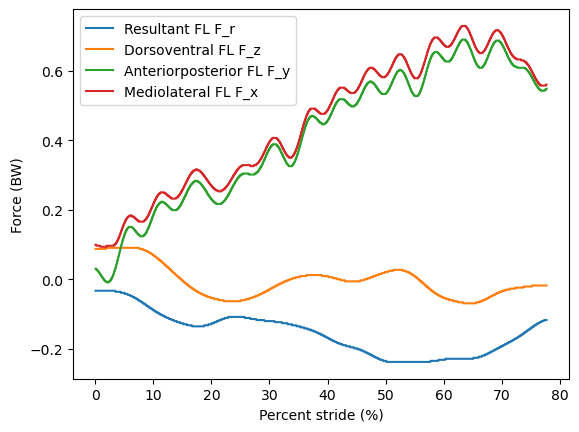

In [97]:
print(p_force_flonly.shape, fl_Fx_bw.shape, fl_Fy_bw.shape, fl_Fz_bw.shape, fl_Fr_bw.shape )
if FL == 1:
    plt.figure(4)
    plt.plot(p_force_flonly, fl_Fx_bw)
    
    plt.plot(p_force_flonly, fl_Fy_bw)
  
    plt.plot(p_force_flonly, fl_Fz_bw)
   
    plt.plot(p_force_flonly, fl_Fr_bw)
   
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Force (BW)')
    plt.legend({'Mediolateral FL F_x', 'Anteriorposterior FL F_y', 'Dorsoventral FL F_z', 'Resultant FL F_r'})
    plt.show()

Saving graph as vector image

<Figure size 640x480 with 0 Axes>

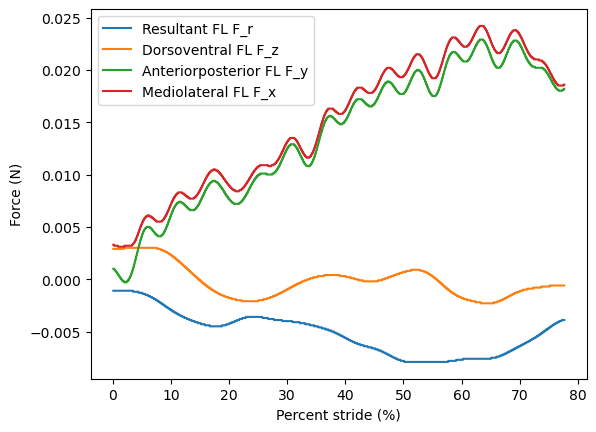

In [98]:
if FL == 1:
    FL_ground_reaction_forces = walk_seq +'_fl_forces_bw.pdf'
    plt.savefig(FL_ground_reaction_forces,format = 'pdf')

    
    plt.figure(5)
    plt.plot(p_force_flonly, f_x_flonly)
   
    plt.plot(p_force_flonly, f_y_flonly)

    plt.plot(p_force_flonly, f_z_flonly)

    plt.plot(p_force_flonly, f_r_flonly)

    plt.xlabel('Percent stride (%)')
    plt.ylabel('Force (N)')
    plt.legend({'Mediolateral FL F_x', 'Anteriorposterior FL F_y', 'Dorsoventral FL F_z', 'Resultant FL F_r'})
    plt.show()

Graphing HL ground reaction forces

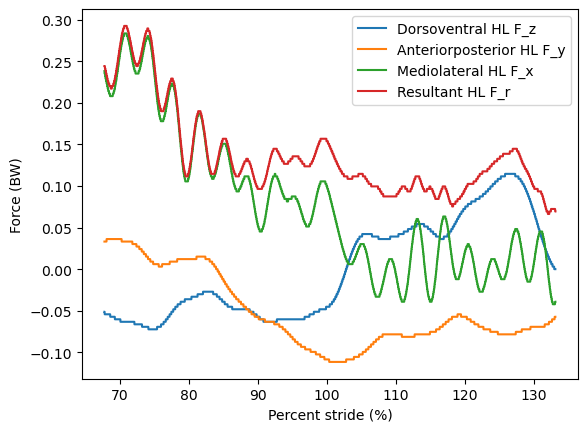

In [99]:
if HL == 1:
    plt.figure(6)
    plt.plot(p_force_hlonly, hl_Fx_bw)
   
    plt.plot(p_force_hlonly, hl_Fy_bw)
   
    plt.plot(p_force_hlonly, hl_Fz_bw)
   
    plt.plot(p_force_hlonly, hl_Fr_bw)
    
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Force (BW)')
    plt.legend({'Mediolateral HL F_x', 'Anteriorposterior HL F_y', 'Dorsoventral HL F_z', 'Resultant HL F_r'})
    plt.show()
    
  



Resultant Force 3D angles (alpha, beta, gamma)* calculation
% In this section, we will calculate the force theta angles (F_ax, F_by, F_yz)
% using the following <https://www.youtube.com/watch?v=HGwSCvKtDFY formula>:
%
% $\alpha_x = cos^{-1}(\frac{F_x}{F_r})$, Mediolateral angle
%
% $\beta_y = cos^{-1}(\frac{F_y}{F_r})$, Anteriorposterior angle
%
% $\gamma_z = cos^{-1}(\frac{F_z}{F_r})$, Dorsoventral angle
%
% *Calculating angles for FL*

In [100]:
#recheck this after talk with crystal, is it okey that 
if FL==1:
    fl_f_alphax = np.arccos(f_x_flonly / f_r_flonly)
    fl_f_betay = np.arccos(f_y_flonly / f_r_flonly)
    fl_f_gammaz = np.arccos(f_z_flonly / f_r_flonly)
    
    print(fl_f_alphax)
    fl_f_alphax_deg = np.degrees(fl_f_alphax)
    fl_f_betay_deg = np.degrees(fl_f_betay)
    fl_f_gammaz_deg = np.degrees(fl_f_gammaz)
    
    print(fl_f_alphax_deg)


27435    1.910633
27436    1.910633
27437    1.910633
27438    1.910633
27439    1.910633
           ...   
30071    1.783201
30072    1.782041
30073    1.782041
30074    1.782041
30075    1.782041
Length: 2641, dtype: float64
27435    109.471221
27436    109.471221
27437    109.471221
27438    109.471221
27439    109.471221
            ...    
30071    102.169872
30072    102.103449
30073    102.103449
30074    102.103449
30075    102.103449
Length: 2641, dtype: float64


Calculating angles for HL

In [101]:
#check with hl info
if HL ==1:
    hl_f_alphax = np.arccos(f_x_hlonly / f_r_hlonly)
    hl_f_betay = np.arccos(f_y_hlonly / f_r_hlonly)
    hl_f_gammaz = np.arccos(f_z_hlonly / f_r_hlonly)
    
    hl_f_alphax_deg = np.degrees(hl_f_alphax)
    hl_f_betay_deg = np.degrees(hl_f_betay)
    hl_f_gammaz_deg = np.degrees(hl_f_gammaz)
    
print(hl_f_alphax.head())


30875    1.782245
30876    1.782245
30877    1.794889
30878    1.794889
30879    1.797739
dtype: float64


% Graphing Force Vector Angles

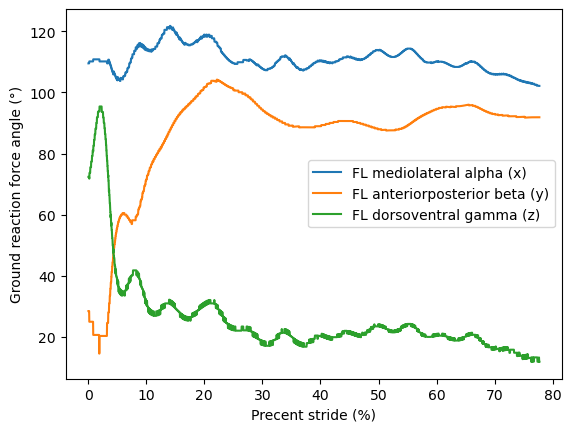

In [102]:
if FL == 1:
    plt.figure(7)
    plt.plot(p_force_flonly, fl_f_alphax_deg)
    
    plt.plot(p_force_flonly, fl_f_betay_deg)
    plt.plot(p_force_flonly, fl_f_gammaz_deg)
    
    plt.xlabel('Precent stride (%)')
    plt.ylabel('Ground reaction force angle (°)')
    plt.legend(['FL mediolateral alpha (x)', 'FL anteriorposterior beta (y)','FL dorsoventral gamma (z)'])
    plt.show()

% Graphing HL Force Vector Directions

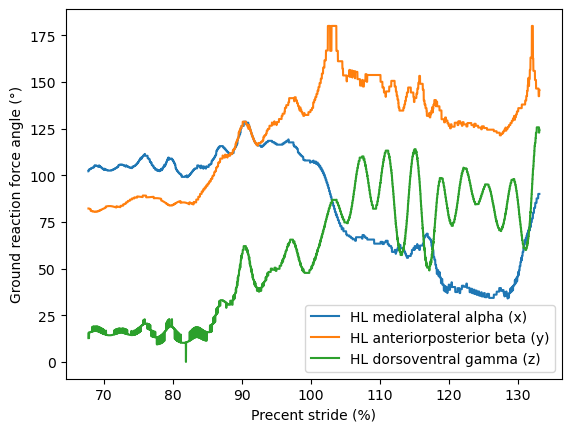

In [103]:
#check with HL INFO
if  HL== 1:
    plt.figure(7)
    plt.plot(p_force_hlonly, hl_f_alphax_deg)
    
    plt.plot(p_force_hlonly, hl_f_betay_deg)
    plt.plot(p_force_hlonly, hl_f_gammaz_deg)
    
    plt.xlabel('Precent stride (%)')
    plt.ylabel('Ground reaction force angle (°)')
    plt.legend(['HL mediolateral alpha (x)', 'HL anteriorposterior beta (y)','HL dorsoventral gamma (z)'])
    plt.show()

Graphing Fx for FL and HL
Graphing Force for the x axis in the Fl and Hl across the stride using normalized force

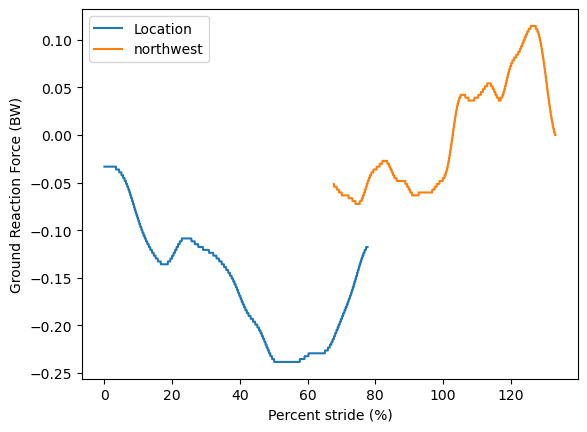

In [151]:

#check with hl info
if HL == 1 and FL == 1:
    plt.figure(9)
    plt.plot(p_force_flonly,fl_Fx_bw, p_force_hlonly,hl_Fx_bw)
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Ground Reaction Force (BW)')
    plt.legend(('FL Mediolateral F_x', 'HL Mediolateral F_x'))
    plt.legend(('Location','northwest'))
    plt.show()

Saving graph has a vector image

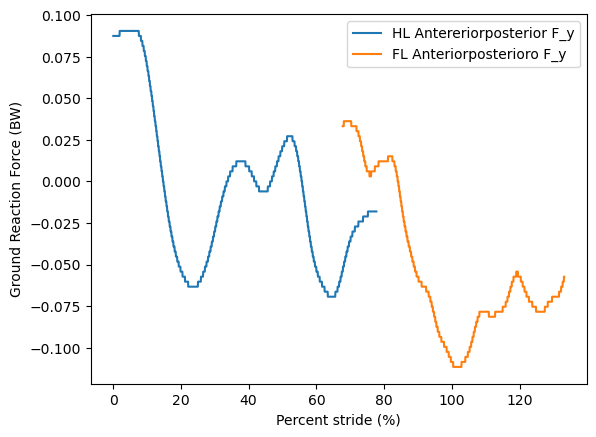

In [105]:
#GraphName9 = append(walk_seq,'_x-axis_pstride.pdf');
# saveas(gca,GraphName3)
#ax1 = gca;
#exportgraphics(ax1, GraphName9,'ContentType','vector');
# Graphing Fy for FL and HL


#check with hl info
if HL == 1 and FL == 1:
    plt.figure(10)
    plt.plot(p_force_flonly,fl_Fy_bw,p_force_hlonly,hl_Fy_bw)
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Ground Reaction Force (BW)')
    plt.legend({'FL Anteriorposterioro F_y', 'HL Antereriorposterior F_y'})
    plt.show()

Save graph as vector data


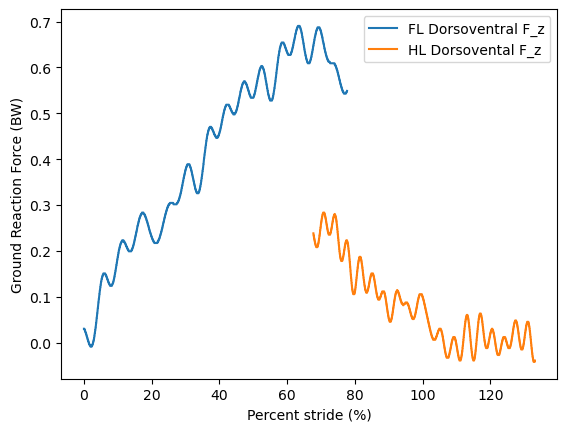

In [106]:
#GraphName10 = append(walk_seq,'_y-axis_pstride.pdf');
# saveas(gca,GraphName3)
#ax1 = gca;
#exportgraphics(ax1, GraphName10,'ContentType','vector');
# Graphing Fz for FL and HL


#check with hl info
if HL == 1 and FL == 1:
    plt.figure(11)
    plt.plot(p_force_flonly,fl_Fz_bw,p_force_hlonly,hl_Fz_bw)
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Ground Reaction Force (BW)')
    plt.legend({'FL Dorsoventral F_z','HL Dorsovental F_z'})
    plt.show()

Saving graph as vector image

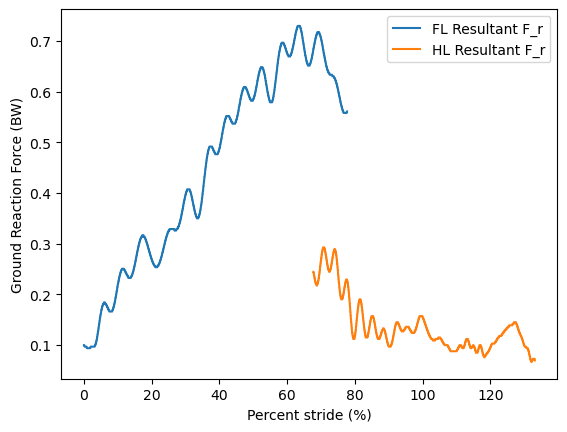

In [107]:
#GraphName11 = append(walk_seq,'_z-axis_pstride.pdf');
# saveas(gca,GraphName3)
#ax1 = gca;
#exportgraphics(ax1, GraphName11,'ContentType','vector');
# Graphing Fr for FL and HL


#CHECK WITH HL INFO
if HL == 1 and FL == 1:
    plt.figure(12)
    plt.plot(p_force_flonly,fl_Fr_bw, p_force_hlonly,hl_Fr_bw)
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Ground Reaction Force (BW)')
    plt.legend({'FL Resultant F_r', 'HL Resultant F_r'})
    plt.show()

Characterizing the Center of Pressure of the animal relative to the force plate.

Using the moment (M) values from Igor, we can calculate where the center of that force is along the force plate. The force plate measures the forces in the X, Y, and Z, as well as the associated Mx and My moments generated about the force plate's x and y axes. Used the following resource for center of pressure (COP) equations.

%FIXME need to smooth moments as well for this calculation!

Equation to find the X_cp

    X_cop = (-My / Fz), Mediolateral COP


Equation to find the Y_cp

    Y_cop = (Mx / Fz), Anterioroposterior COP Calculating the X_cp and Y_cp for FL We assume the center of pressure equates to z=0 in the video frame which is the top of the force plate

In [108]:
if FL == 1 and s1_start_force_c  > 0:
    fl_Xcp = -(m_y_flonly/f_z_flonly)
    fl_Ycp = (m_x_flonly/f_z_flonly)
    fl_Zcp = 0
print(fl_Xcp.shape)

(2641,)


Graphing FL Center of Pressure

/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_12193/1349475804.py:6: UserWarning: The handle '_' has a label of '_' which cannot be automatically added to the legend.
  plt.legend('FL X_{CP}', 'FL Y_{CP}')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_12193/1349475804.py:6: UserWarning: Legend does not support 'F' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('FL X_{CP}', 'FL Y_{CP}')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_12193/1349475804.py:6: UserWarning: Legend does not support 'L' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('FL X_{CP}', 'FL Y_{CP}')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_12193/1349475804.py:6: UserWarning: Legend does not su

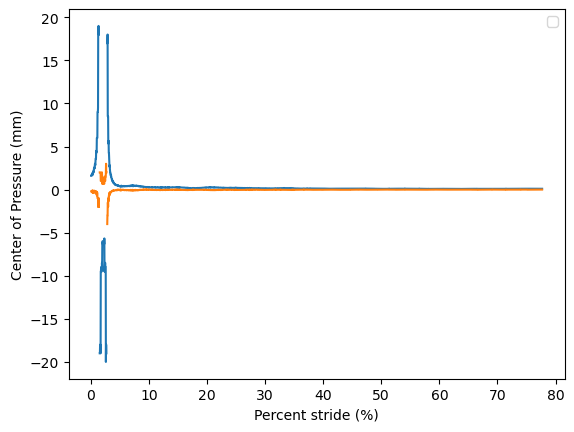

In [109]:
if FL == 1:
    plt.figure(13)
    plt.plot (p_force_flonly,fl_Xcp, p_force_flonly,fl_Ycp)
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend('FL X_{CP}', 'FL Y_{CP}')
    plt.show()

Saves graph as vector image

(3321,)


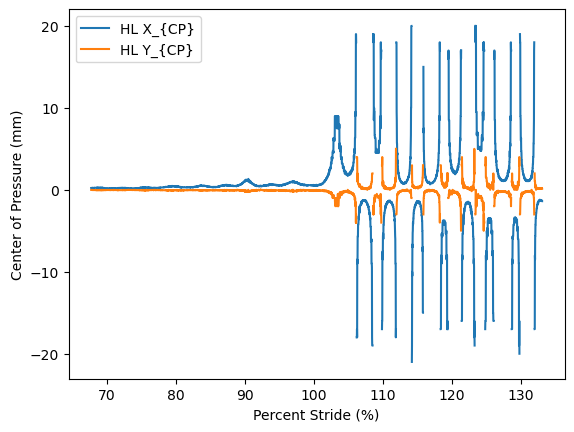

In [110]:
#GraphName9 = append(walk_seq,'_fl_COP_pstride.pdf');
# saveas(gca,GraphName3)
#ax1 = gca;
#exportgraphics(ax1, GraphName9,'ContentType','image');
# Calculating the Xcp and Ycp for the HL
# Similar to the FL assummed that z_cp = 0 relative to the video frame of reference
# which corresponds to the limb in contact with the force plate.



#CHECK WITH HL INFO
if HL == 1:
    hl_Xcp = (-m_y_hlonly / f_z_hlonly)
    hl_Ycp = (m_x_hlonly / f_z_hlonly)
    hl_Zcp = 0
    print(hl_Xcp.shape)
    
    
    plt.figure(14)
    plt.plot (p_force_hlonly,hl_Xcp, p_force_hlonly,hl_Ycp)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend({'HL X_{CP}', 'HL Y_{CP}'})
    plt.show()


In [111]:
#Saves graph as a vector image
#GraphName10= append(walk_seq,'_hl_COP_pstride.pdf');
# saveas(gca,GraphName3)
#ax1 = gca;
#exportgraphics(ax1, GraphName10,'ContentType',

Calculating change in COP as it moves along the limb for a stride

To know where in the video data the COP is, we first find where the force is moving along the force plate as the position over force moves along the foot/hand. This code calculates the difference between the COP vidoe postion relative to the force plate readout. Where a value of 0 corresponds to the inital position of phalange touch down: HL heel and FL is the tip of the toe

%TODO figure out what units COP is in mm? or m? Need to look at forceplate calibration document
for FL (tip of phalange)

In [112]:
#recheck this after crystal talk on time frames 
if FL == 1:
    delta_Xcp_fl = fl_Xcp - fl_Xcp.iloc[-1]
    delta_Ycp_fl = fl_Ycp - fl_Ycp.iloc[-1]
    delta_Zcp_fl = fl_Zcp - fl_Zcp
    
print(delta_Xcp_fl.shape)

(2641,)


for HL(heel)

In [113]:
#check with HL info
if HL == 1:
    delta_Xcp_hl = hl_Xcp-hl_Xcp.iloc[0]
    delta_Ycp_hl = hl_Ycp-hl_Ycp.iloc[0]
    delta_Zcp_hl = hl_Zcp-hl_Zcp

print(delta_Xcp_hl.shape)


(3321,)


Graphing

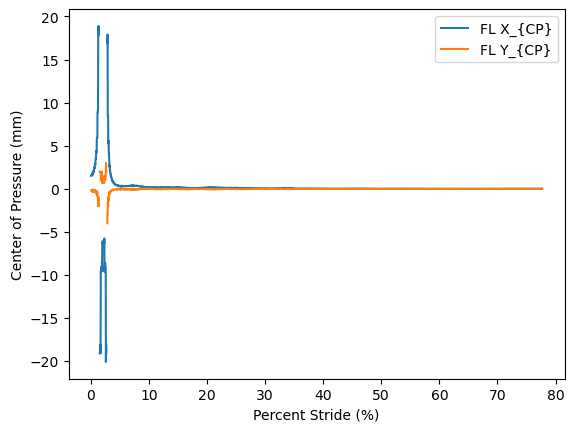

In [114]:
if FL == 1:
    plt.figure(15)
    plt.plot (p_force_flonly,delta_Xcp_fl, p_force_flonly,delta_Ycp_fl)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend({'FL X_{CP}', 'FL Y_{CP}'})
    plt.show()


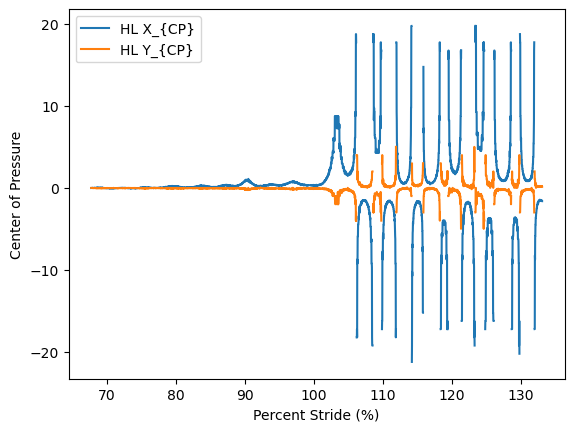

In [152]:
if HL == 1:
    plt.figure(16)
    plt.plot (p_force_hlonly,delta_Xcp_hl, p_force_hlonly,delta_Ycp_hl)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure')
    plt.legend(('HL X_{CP}', 'HL Y_{CP}'))
    plt.show()

Down sampling FL and HL COP Force Data

Reducing the frequency of the force (COP) data since force and video data were sampled at different frequencies and we now need to compare the two within time.

Finding size of video data arrays

In [116]:
if FL == 1:
    fl_array = len(pt10_Z_fl_only)

print(fl_array)

hl_array = len(pt9_X_hl_only)
print(hl_array)


66
84


Resizing force data to compare/make calcualtions w/video data

In [117]:
#check again 

if FL == 1:
    new_delta_Xcp_fl = delta_Xcp_fl.iloc[1::40]
    new_delta_Ycp_fl = delta_Ycp_fl.iloc[1::40]
    
print(new_delta_Xcp_fl.shape)

print(new_delta_Ycp_fl.shape)


if HL == 1:
    new_delta_Xcp_hl = delta_Xcp_hl.iloc[::40]
    new_delta_Ycp_hl = delta_Ycp_hl.iloc[::40]
    
print(new_delta_Xcp_hl.shape)
print(new_delta_Xcp_hl.shape)



(66,)
(66,)
(84,)
(84,)


Incase the force and video data don't line up will need to delete one value for the end of the force array


In [118]:
if FL == 1:
    row_delta_fl = len(new_delta_Xcp_fl)
    row_pstride_fl = len(pstride_flonly)


if HL == 1:
    row_delta_hl = len(new_delta_Xcp_hl)
    row_pstride_hl = len(pstride_hlonly)
    
#print(row_delta_fl)
print("row_delta_fl", row_delta_fl, "row_pstride_fl", row_pstride_fl )

print("row_delta_hl", row_delta_hl)
print("pstride_hlonly", pstride_hlonly.shape)

if FL == 1:
    if row_delta_fl != row_pstride_fl:
        difference = row_pstride_fl - row_delta_fl
        if difference > 0: # pstride is longer than delta
            pstride_flonly=pstride_flonly[1:]
            display("difference", difference)
        
        elif difference < 0: # if delta is longer then p stride
            new_delta_Xcp_fl=new_delta_Xcp_fl[:-1]
            new_delta_Ycp_fl=new_delta_Ycp_fl[:-1]
            
if HL == 1:
    if row_delta_hl != row_pstride_hl:
        difference = row_pstride_hl - row_delta_hl
        if difference > 0: # pstride is longer than delta
            pstride_hlonly=pstride_hlonly[1:]
            
        
        elif difference < 0: # if delta is longer then p stride
            new_delta_Xcp_hl=[new_delta_Xcp_hl[:-1]]
            new_delta_Ycp_hl=[new_delta_Ycp_hl[:-1]]
                       


row_delta_fl 66 row_pstride_fl 66
row_delta_hl 84
pstride_hlonly (84,)


Deciding where to cut analysis for FL & HL

(66,) (66,) (66,) (66,)
(84,) (84,) (84,) (84,)


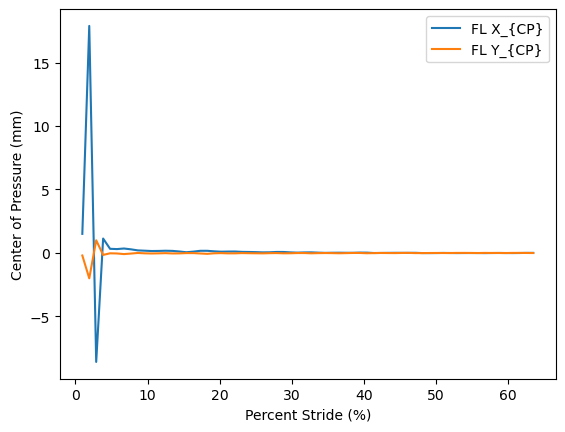

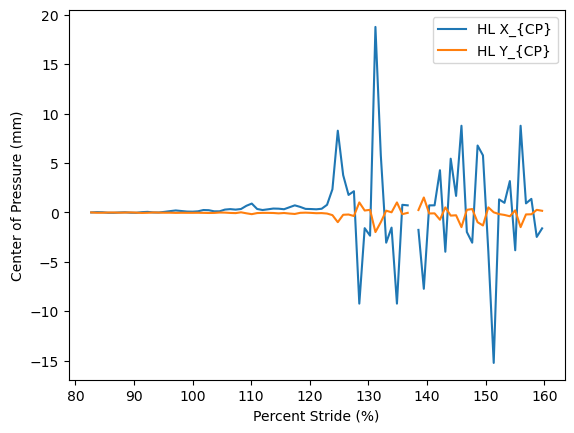

In [153]:
print( pstride_flonly.shape,new_delta_Xcp_fl.shape, pstride_flonly.shape,new_delta_Ycp_fl.shape)

print(pstride_hlonly.shape,new_delta_Xcp_hl.shape, pstride_hlonly.shape,new_delta_Ycp_hl.shape)

if FL == 1:
    plt.figure(17)
    plt.plot (pstride_flonly,new_delta_Xcp_fl, pstride_flonly,new_delta_Ycp_fl)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend(('FL X_{CP}', 'FL Y_{CP}'))
    plt.show()

if HL == 1:
    plt.figure(18)
    plt.plot (pstride_hlonly,new_delta_Xcp_hl, pstride_hlonly,new_delta_Ycp_hl)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend(('HL X_{CP}', 'HL Y_{CP}'))



In [120]:
#this is good 
round_pstride_fl = np.round(pstride_flonly, 1)
#print(round_pstride_fl)
cut_FL = np.where(round_pstride_fl==31)[0]
print(cut_FL)

if HL == 1:
    round_pstride_hl = np.round(pstride_hlonly, 1)
    cut_HL = np.where(round_pstride_hl==156)[0]
print("cut_HL", cut_HL)    
print("round_pstride_hl", round_pstride_hl.shape )


[]
cut_HL [79]
round_pstride_hl (84,)


Down Sampling Force Data
Resizing force data to compare/make calcualtions joint position data (video data)

In [121]:
#recheck
new_f_x_flonly = f_x_flonly[1::40]
print(new_f_x_flonly.shape)
new_f_y_flonly = f_y_flonly[1::40]
print("new_f_y_flonly", new_f_y_flonly.shape)
new_f_z_flonly = f_z_flonly[1::40]
new_f_r_flonly = f_r_flonly[1::40]
print("new_f_r_flonly", new_f_r_flonly.shape)

if HL == 1:
    new_f_x_hlonly = f_x_hlonly[::40]
    new_f_y_hlonly = f_y_hlonly[::40]
    new_f_z_hlonly = f_z_hlonly[::40]
    new_f_r_hlonly = f_r_hlonly[::40]

print("new_f_y_hlonly", new_f_y_hlonly.shape)


(66,)
new_f_y_flonly (66,)
new_f_r_flonly (66,)
new_f_y_hlonly (84,)


Incase the force and video data don't line up will need to delete one value from the end of the force array

In [122]:
row_forcedelta_fl = len(new_f_x_flonly)
row_pstride_fl = len(pstride_flonly)
print(row_forcedelta_fl)
print(row_pstride_fl)

if HL == 1:
    row_forcedelta_hl = len(new_f_x_hlonly)
    row_pstride_hl = len(pstride_hlonly)
    
if row_forcedelta_fl != row_pstride_fl:
    difference_forcefl = row_pstride_fl - f_x_hlonly
    if difference_forcefl < 0: # if delta is longer then p stride
        new_f_x_flonly=new_f_x_flonly[:-1]
        new_f_y_flonly=new_f_y_flonly[:-1]
        new_f_z_flonly=new_f_z_flonly[:-1]
        new_f_r_flonly=new_f_r_flonly[:-1]
        
#print(new_f_x_flonly)

if HL == 1:
    if row_forcedelta_hl != row_pstride_hl:
        difference_forcehl = row_pstride_hl - row_forcedelta_hl
        if difference_forcehl < 0: # if delta is longer then p stride
            new_f_x_hlonly=new_f_x_hlonly[:-1]
            new_f_y_hlonly=new_f_y_hlonly[:-1]
            new_f_z_hlonly=new_f_z_hlonly[:-1]
            new_f_r_hlonly=new_f_r_hlonly[:-1]
print(new_f_y_hlonly.shape)

66
66
(84,)


XYZ Points of COP relative to video coordinates


This section creates a new variable that takes the COP estimate from the video for the HL (pt8-ankle) and adds the force COP to correlate with the shift in force production along the limb (within the reference frame of the video). Adds the difference from the beginning of HL contact .

Likewise for the FL, we use pt 10 (phalange) and add the difference from the end of FL contact.

This finds the xyz postion of the COP relative to the video coordinates, where a value of zero in the HL corresponds to the heel, and a value of zero in the FL corresponds to the tip of the phalanage.

In [123]:


if FL == 1:
    pt10_Xcop_flonly = pt10_X_fl_only.iloc[-1] - new_delta_Ycp_fl
    pt10_Ycop_flonly = pt10_Y_fl_only.iloc[-1] + new_delta_Xcp_fl
    pt10_Zcop_flonly = 0
print(pt10_Xcop_flonly)

if HL == 1:
    pt9_Xcop_hlonly = pt9_X_hl_only.iloc[0] - new_delta_Ycp_hl
    pt9_Ycop_hlonly = pt9_Y_hl_only.iloc[0] + new_delta_Xcp_hl
    pt9_Zcop_hlonly = 0


27436    12.328841
27476    14.128841
27516    11.128841
27556    12.282687
27596    12.155156
           ...    
29876    12.133719
29916    12.123890
29956    12.123865
29996    12.128841
30036    12.134365
Length: 66, dtype: float64


Graphing new COP video XYZ points

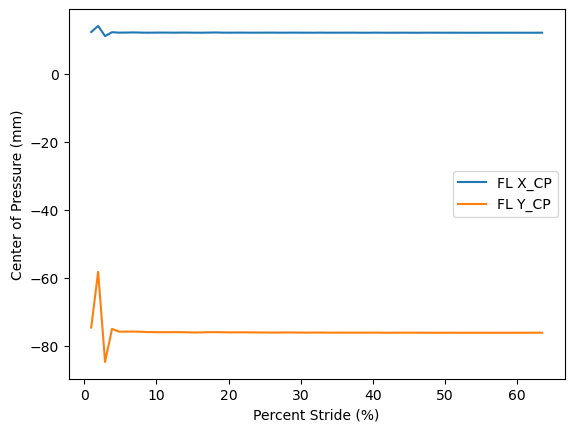

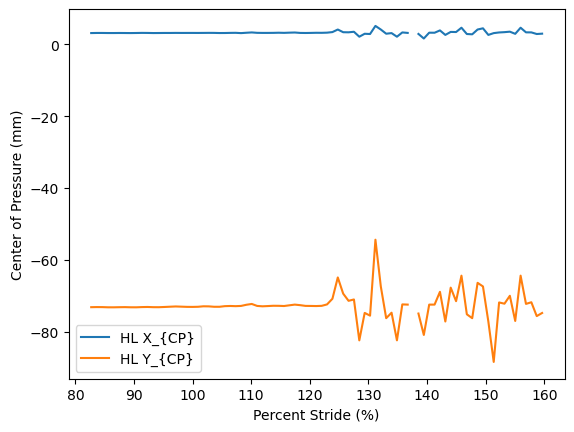

In [154]:
if FL == 1:
    plt.figure(19)
    plt.plot(pstride_flonly, pt10_Xcop_flonly, pstride_flonly, pt10_Ycop_flonly)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend(('FL X_CP', 'FL Y_CP'))
    plt.show()

if HL == 1:
    plt.figure(20)
    plt.plot(pstride_hlonly, pt9_Xcop_hlonly, pstride_hlonly, pt9_Ycop_hlonly)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend(('HL X_{CP}', 'HL Y_{CP}'))
    plt.show()

Making the COP the Origin for Force Vector Analysis
This is to ensure than the force vector always originates at the origin relative to the joint angles.
FL: shoulder pt 3, elbow pt 4, and wrist pt 5

In [125]:
#reheck this 
if FL == 1:
    print("pt4_X_fl_only:", pt4_X_fl_only.shape)
    print("pt10_Xcop_flonly:", pt10_Xcop_flonly.shape)
    
    print("Index of pt4_X_fl_only:", pt4_X_fl_only.index)
    print("Index of pt10_Xcop_fl", pt10_Xcop_flonly.index)
    
    pt4_X_fl_only = pt4_X_fl_only.reset_index(drop=True)
    pt10_Xcop_flonly_series = pt10_Xcop_flonly.reset_index(drop=True) #i might want to do these change in index from the formation of pt10_Xcop_flonly, 
    print("pt10_Xcop_flonly_aligned", pt10_Xcop_flonly_series.shape)
    #normalizing new points for shoulder (pt4)
    norm_pt4_x = pt4_X_fl_only - pt10_Xcop_flonly_series
    
    pt4_Y_fl_only = pt4_Y_fl_only.reset_index(drop=True)

    pt10_Ycop_flonly_series = pt10_Ycop_flonly.reset_index(drop=True) #i might want to do these change in index from the formation of pt10_Xcop_flonly, 
    norm_pt4_y = pt4_Y_fl_only - pt10_Ycop_flonly_series
    norm_pt4_z = pt4_Z_fl_only - pt10_Zcop_flonly
    
    #print( "norm_pt4_x",norm_pt4_x) these are similar to matlab but not quite the same 
    #print("norm_pt4_y", norm_pt4_y)
    #print("norm_pt4_z", norm_pt4_z) #these are the same as matlab
    
    
     #normalizing new points  for elbow (pt2)
    pt2_X_fl_only = pt2_X_fl_only.reset_index(drop=True)
    norm_pt2_x = pt2_X_fl_only - pt10_Xcop_flonly_series
    #print("norm_pt2_x",norm_pt2_x)
    
    pt2_Y_fl_only = pt2_Y_fl_only.reset_index(drop=True)
    norm_pt2_y = pt2_Y_fl_only - pt10_Ycop_flonly_series
    #print("norm_pt2_y", norm_pt2_y)
    
    norm_pt2_z = pt2_Z_fl_only - pt10_Zcop_flonly
    #print("norm_pt2_z",norm_pt2_z)
    
    #normalizing new points  for wrist (pt3)
    pt3_X_fl_only = pt3_X_fl_only.reset_index(drop=True)
    norm_pt3_x = pt3_X_fl_only - pt10_Xcop_flonly_series
    print("norm_pt3_x", norm_pt3_x)
    
    pt3_Y_fl_only = pt3_Y_fl_only.reset_index(drop=True)
    norm_pt3_y = pt3_Y_fl_only - pt10_Ycop_flonly_series
    print("norm_pt3_y", norm_pt3_y)
    norm_pt3_z = pt3_Z_fl_only - pt10_Zcop_flonly
    
      
   
    

pt4_X_fl_only: (66,)
pt10_Xcop_flonly: (66,)
Index of pt4_X_fl_only: RangeIndex(start=31, stop=97, step=1)
Index of pt10_Xcop_fl RangeIndex(start=27436, stop=30076, step=40)
pt10_Xcop_flonly_aligned (66,)
norm_pt3_x 0    -6.646067
1    -7.881280
2    -3.982530
3    -4.701035
4    -4.312624
        ...   
61   -2.527951
62   -2.504878
63   -2.602893
64   -2.636099
65   -2.721905
Length: 66, dtype: float64
norm_pt3_y 0     -3.849367
1    -19.894113
2      6.901663
3     -2.415711
4     -1.052961
        ...    
61     0.521020
62     0.237647
63     0.240771
64    -0.050378
65    -0.045181
Length: 66, dtype: float64


HL: Hip pt 7, knee pt 8, ankle pt 9

In [126]:
if HL == 1:
    #normalizing new points  for hip (pt7)
    
    pt7_X_hl_only = pt7_X_hl_only.reset_index(drop=True)
    pt9_Xcop_hlonly_series =pt9_Xcop_hlonly.reset_index(drop=True)
    norm_pt7_x = pt7_X_hl_only - pt9_Xcop_hlonly_series
    print(norm_pt7_x.shape)
    
    pt7_Y_hl_only = pt7_Y_hl_only.reset_index(drop=True)
    pt9_Ycop_hlonly_series = pt9_Ycop_hlonly.reset_index(drop=True)
    norm_pt7_y = pt7_Y_hl_only - pt9_Ycop_hlonly_series
    
    pt7_Z_hl_only =pt7_Z_hl_only.reset_index(drop=True)
    norm_pt7_z = pt7_Z_hl_only - pt9_Zcop_hlonly
    
    #normalizing new points  for knee (pt5)
    pt5_X_hl_only = pt5_X_hl_only.reset_index(drop=True)
    norm_pt5_x = pt5_X_hl_only - pt9_Xcop_hlonly_series
    
    pt5_Y_hl_only =pt5_Y_hl_only.reset_index(drop=True)
    norm_pt5_y = pt5_Y_hl_only - pt9_Ycop_hlonly_series
    
    pt5_Z_hl_only = pt5_Z_hl_only.reset_index(drop=True)
    norm_pt5_z = pt5_Z_hl_only - pt9_Zcop_hlonly
    
    #normalizing new points  for ankle (pt6)
    pt6_X_hl_only = pt6_X_hl_only.reset_index(drop=True)
    norm_pt6_x = pt6_X_hl_only - pt9_Xcop_hlonly_series
    
    pt6_Y_hl_only = pt6_Y_hl_only.reset_index(drop=True)
    norm_pt6_y = pt6_Y_hl_only - pt9_Ycop_hlonly_series
    
    pt6_Z_hl_only = pt6_Z_hl_only.reset_index(drop=True)
    norm_pt6_z = pt6_Z_hl_only - pt9_Zcop_hlonly
    
    print( "pt9_Xcop_hlonly", pt9_Xcop_hlonly.shape, "pt5_X_hl_only",pt5_X_hl_only.shape, "norm_pt5_x", norm_pt5_x)
    


(84,)
pt9_Xcop_hlonly (84,) pt5_X_hl_only (84,) norm_pt5_x 0      6.190589
1      6.469386
2      6.708292
3      7.001396
4      7.115211
        ...    
79    40.148226
80    42.015870
81    42.589011
82    43.779509
83    44.230175
Length: 84, dtype: float64


Setting up joint and force vectors

Flipping GRF force x and y becuase the reference frames are flipped in the video vs. the force plate. As a result need to get the inverse for force x by mulitplying by -1.

In [127]:
if FL == 1:
    new_f_x_flonly_flip = new_f_x_flonly * -1
print("new_f_x_flonly_flip",new_f_x_flonly_flip)

if HL == 1:
    new_f_x_hlonly_flip = new_f_x_hlonly * -1


new_f_x_flonly_flip 27436    0.0011
27476    0.0011
27516    0.0011
27556    0.0012
27596    0.0013
          ...  
29876    0.0059
29916    0.0055
29956    0.0050
29996    0.0045
30036    0.0041
Name: Fx_SS, Length: 66, dtype: float64


Creating matrices for joint moment arm calculations

In [128]:
#rechecks this 

if FL == 1:
    #only new_f_x_flonly_flip and new_f_z_flonly are the same in matlab
    new_f_y_flonly_reset = new_f_y_flonly.reset_index(drop=True)
    new_f_x_flonly_flip_reset = new_f_x_flonly_flip.reset_index(drop=True)
    new_f_z_flonly_reset = new_f_z_flonly.reset_index(drop=True)

    GRF_fl = pd.concat([new_f_y_flonly_reset, new_f_x_flonly_flip_reset, new_f_z_flonly_reset], axis=1)
    
    
   
print(GRF_fl.shape)

if HL == 1:
    
    new_f_y_hlonly_reset = new_f_y_hlonly.reset_index(drop=True)
    print(" new_f_y_hlonly",new_f_y_hlonly.shape)
    new_f_x_hlonly_flip_reset = new_f_x_hlonly_flip.reset_index(drop=True)
    new_f_z_hlonly_reset = new_f_z_hlonly.reset_index(drop=True)

    GRF_hl = pd.concat([new_f_y_hlonly_reset, new_f_x_hlonly_flip_reset, new_f_z_hlonly_reset], axis=1)
    
    print("new_f_y_hlonly_reset", new_f_y_hlonly_reset.shape)
    
   # GRF_hl = [new_f_y_hlonly, new_f_x_hlonly_flip, new_f_z_hlonly]


if FL == 1:
    
    p3 = np.column_stack([norm_pt3_x.values, norm_pt3_y.values, norm_pt3_z.values])
    p4 = np.column_stack([norm_pt4_x.values, norm_pt4_y.values, norm_pt4_z.values])
    p2 = np.column_stack([norm_pt2_x.values, norm_pt2_y.values, norm_pt2_z.values])
    #%p6 = [norm_pt6_x, norm_pt6_y, norm_pt6_z] % for kassina
print("p3 shape ",p3.shape, "norm_pt3_x", norm_pt3_x.shape)

print("norm_pt7_x", norm_pt7_x)
if HL == 1:
    p7 = np.column_stack([norm_pt7_x.values, norm_pt7_y.values, norm_pt7_z.values])
    p5 = np.column_stack([norm_pt5_x.values, norm_pt5_y.values, norm_pt5_z.values])
    p6 = np.column_stack([norm_pt6_x.values, norm_pt6_y.values, norm_pt6_z.values])

print("p7 shape ",p7.shape, "norm_pt7_x", norm_pt3_x.shape)
#print(len(new_f_y_flonly))
#print(len(new_f_x_flonly_flip))
#print(len(new_f_z_flonly))
if FL == 1:
    GRF_fl_40 = [new_f_y_flonly.iloc[39], new_f_x_flonly_flip.iloc[39], new_f_z_flonly.iloc[39]]
print(GRF_fl_40)

if HL == 1:
    GRF_hl_40 = [new_f_y_hlonly.iloc[39], new_f_x_hlonly_flip.iloc[39], new_f_z_hlonly.iloc[39]]


if FL == 1:
    p3_40 = [norm_pt3_x.iloc[39], norm_pt3_y.iloc[39], norm_pt3_z.iloc[39]]
    p4_40 = [norm_pt4_x.iloc[39], norm_pt4_y.iloc[39], norm_pt4_z.iloc[39]]
    p2_40 = [norm_pt2_x.iloc[39], norm_pt2_y.iloc[39], norm_pt2_z.iloc[39]]
    #%p6_40 = [norm_pt6_x.iloc[39], norm_pt6_y.iloc[39], norm_pt6_z.iloc[39]] # for kassina
print(p3_40)

if HL == 1:
    p7_40 = [norm_pt7_x.iloc[39], norm_pt7_y.iloc[39], norm_pt7_z.iloc[39]]
    p5_40 = [norm_pt5_x.iloc[39], norm_pt5_y.iloc[39], norm_pt5_z.iloc[39]]
    p6_40 = [norm_pt6_x.iloc[39], norm_pt6_y.iloc[39], norm_pt6_z.iloc[39]]


(66, 3)
 new_f_y_hlonly (84,)
new_f_y_hlonly_reset (84,)
p3 shape  (66, 3) norm_pt3_x (66,)
norm_pt7_x 0      0.000000
1     -0.019890
2     -0.012799
3      0.006735
4      0.008170
        ...    
79    36.038096
80    38.347707
81    38.906818
82    40.080289
83    41.118142
Length: 84, dtype: float64
p7 shape  (84, 3) norm_pt7_x (66,)
[-0.0001, 0.0068, 0.0178]
[-3.677646505494506, 0.09109852586739464, 74.513457]


Analysing Joint Moments and Torques
This code will:
Create new set points for the FL that are normalized to be in a same sized array and will only contain the data values from when only the FL is in contact with the force plate
Creating new set points for HL that are normalized to be in a same sized array and will only contain the data values from when only the HL is in contact with the force plate
Use the new set points to calculate for the moment arm () in order to calulate for the joint toque
Calulate resultatnt force, , using the data values from the force plate data sets
Once () is obtained, use the results to calculate for joint torque using the equation:  
Equations were based upon the following resource
Calculating moment arm/radius ultimately for torque calculations
Calculating the moment arm length based upon the 3D position of the joint angle (e.g. pt. 6) and the force vector which begins and the COP origin.

    |a_2| = √|a|^2 - |(a * b/|b|) * b/|b| | ^3
Where a, is the joint center point
And b, is the force vector.
*, denotes the crossproduct
Alternatively it can also be calculated as:

    d = |⇀x0 x (⇀x0 - ⇀x2)| / |⇀x2|
Where,
X0= Joint position coordinates
X2= GRF
x, denotes the cross product
Identifying joint radii (*$r$) for the FL relative to force normal*
 = shoulder point(pt3)
 = elbow point(pt4)
 = wrist point(pt5)

In [129]:
if FL == 1:
    GRF_carrot_fl = GRF_fl / np.linalg.norm(GRF_fl, axis=1)[:, np.newaxis]
    s_1 = np.array(np.sum(p4 * GRF_carrot_fl, axis=1))[:, np.newaxis] * GRF_carrot_fl

    print(s_1)
    r_s = np.sqrt(np.linalg.norm(p4, axis=1)**2 - np.linalg.norm(s_1, axis=1)**2)
    
    
    e_1 = np.array(np.sum(p2 * GRF_carrot_fl, axis=1,)) [:, np.newaxis]* GRF_carrot_fl
    r_e = np.sqrt(np.linalg.norm(p2, ord=2, axis=1) ** 2 - np.linalg.norm(e_1, ord=2, axis=1) ** 2)
    
    w_1 = np.array(np.sum(p3 * GRF_carrot_fl, axis=1)) [:, np.newaxis] * GRF_carrot_fl
    r_w = np.sqrt(np.linalg.norm(p3, ord=2, axis=1) ** 2 - np.linalg.norm(w_1, ord=2, axis=1) ** 2)

        Fy_SS      Fx_SS      Fz_SS
0    4.685093   1.777104   1.615549
1  -20.915395  -7.933426  -0.721221
2  -15.516793  -5.689491   1.034453
3    9.218607   3.687443   3.994730
4   25.475328  11.039309  32.268749
..        ...        ...        ...
61  -2.754574  18.057761  62.743067
62  -2.503085  17.208712  63.202907
63  -2.226799  15.905705  63.940934
64  -2.020335  15.152509  64.313982
65  -2.139163  14.617616  64.531428

[66 rows x 3 columns]


Graphing FL Joint Moments

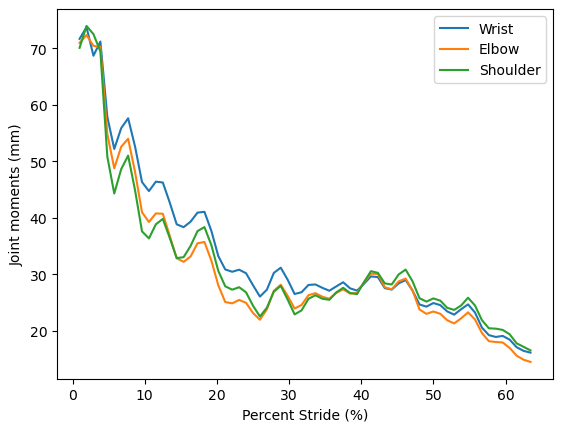

In [130]:
if FL == 1:
    plt.figure(21)
    plt.plot(pstride_flonly, r_s, pstride_flonly, r_e, pstride_flonly, r_w)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Joint moments (mm)')
    plt.legend({'Shoulder', 'Elbow', 'Wrist'})
    plt.show()

Identifying joint radii (*$r$) for the HL relative to force normal*
 rh= hip point(pt6)
 rk= elbow point(pt7)
 ra= ankle point(pt8)

In [131]:
if HL == 1:
    GRF_carrot_hl = GRF_hl / np.linalg.norm(GRF_hl, axis=1)[:, np.newaxis]
    
    print("GRF_carrot_hl", GRF_carrot_hl.shape, "GRF_hl", GRF_hl.shape)
    h_1 = np.array(np.sum(p7 * GRF_carrot_hl, axis=1))[:, np.newaxis] * GRF_carrot_hl

    print(s_1)
    r_h = np.sqrt(np.linalg.norm(p7, axis=1)**2 - np.linalg.norm(h_1, axis=1)**2)
    
    
    k_1 = np.array(np.sum(p5 * GRF_carrot_hl, axis=1,)) [:, np.newaxis]* GRF_carrot_hl
    r_k = np.sqrt(np.linalg.norm(p5, ord=2, axis=1) ** 2 - np.linalg.norm(k_1, ord=2, axis=1) ** 2)
    
    a_1 = np.array(np.sum(p6 * GRF_carrot_hl, axis=1)) [:, np.newaxis] * GRF_carrot_hl
    r_a = np.sqrt(np.linalg.norm(p6, ord=2, axis=1) ** 2 - np.linalg.norm(a_1, ord=2, axis=1) ** 2)

GRF_carrot_hl (84, 3) GRF_hl (84, 3)
        Fy_SS      Fx_SS      Fz_SS
0    4.685093   1.777104   1.615549
1  -20.915395  -7.933426  -0.721221
2  -15.516793  -5.689491   1.034453
3    9.218607   3.687443   3.994730
4   25.475328  11.039309  32.268749
..        ...        ...        ...
61  -2.754574  18.057761  62.743067
62  -2.503085  17.208712  63.202907
63  -2.226799  15.905705  63.940934
64  -2.020335  15.152509  64.313982
65  -2.139163  14.617616  64.531428

[66 rows x 3 columns]


Graphing HL Joint Moments

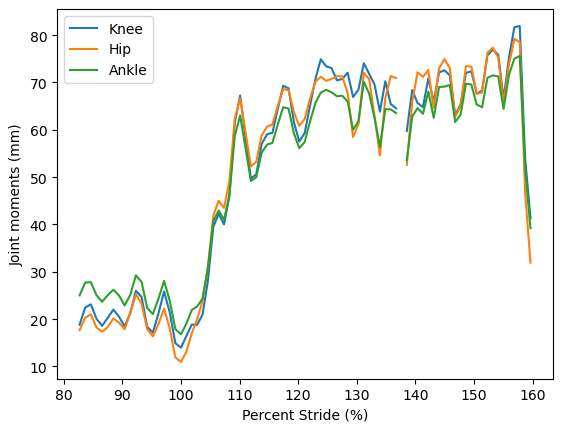

In [132]:
if HL == 1:
    plt.figure(22)
    plt.plot(pstride_hlonly, r_h, pstride_hlonly, r_k, pstride_hlonly, r_a)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Joint moments (mm)')
    plt.legend({'Hip', 'Knee', 'Ankle'})
    plt.show()

Calculating Torque

Where,
 t= torque
 r= moment arms
 Fr= force int results
 
Forelimb Torques

In [133]:
if FL == 1:
    torque_s = r_s * new_f_r_flonly
    torque_e = r_e * new_f_r_flonly
    torque_w = r_w * new_f_r_flonly

Graphing Torques

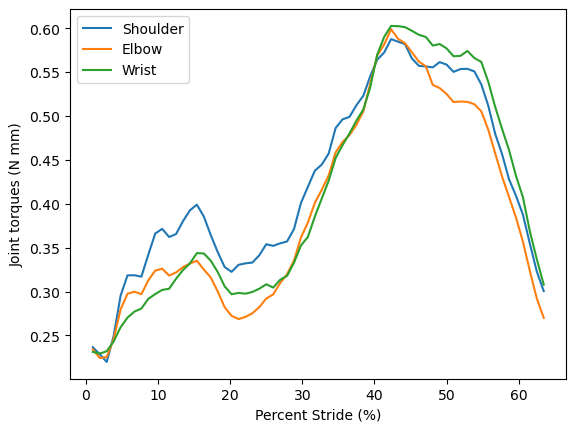

In [134]:
if FL == 1:
    plt.figure(23)
    plt.plot(pstride_flonly, torque_s, pstride_flonly, torque_e, pstride_flonly, torque_w)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Joint torques (N mm)')
    plt.legend(['Shoulder', 'Elbow', 'Wrist'])
    plt.show()

Hindlimb Torques

In [135]:
if HL == 1:
    torque_h = r_h * new_f_r_hlonly
    torque_k = r_k * new_f_r_hlonly
    torque_a = r_a * new_f_r_hlonly


Graphing HL Torques

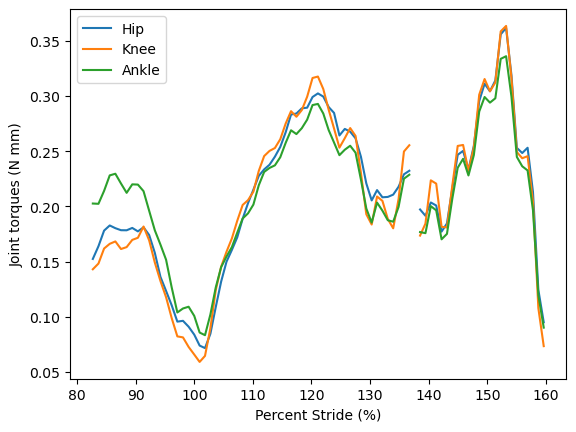

In [136]:
if HL == 1:
    plt.figure(24)
    plt.plot(pstride_hlonly, torque_h, pstride_hlonly, torque_k, pstride_hlonly, torque_a)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Joint torques (N mm)')
    plt.legend(['Hip', 'Knee', 'Ankle'])
    plt.show()

*Displaying force direction in quiver plot for the FL (lateral view z-x)*
% Note: new_f_y_flonly is x in video

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 640x480 with 0 Axes>

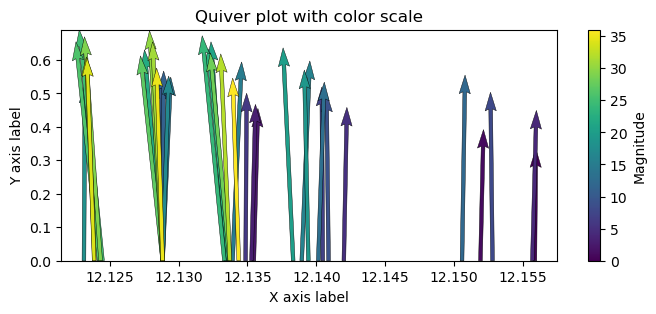

In [167]:
if FL ==1:
    if film_side_right == 0:
        pstride_fl_quiv = pstride_flonly[29:]  # equivalent to pstride_flonly(30:end)
        x_quiv_fl = -pt10_Xcop_flonly[29:]  # equivalent to -pt10_Xcop_flonly(30:end)
        quiv_fl_size = len(x_quiv_fl)
        y_array_fl = np.zeros(quiv_fl_size)
        u_quiv_fl_lat = -new_f_y_flonly[29:] / bod_weight_N
        v_quiv_fl_lat = new_f_z_flonly[29:] / bod_weight_N
    else:
        pstride_fl_quiv = pstride_flonly[29:]  # equivalent to pstride_flonly(30:end)
        x_quiv_fl = pt10_Xcop_flonly[29:]  # equivalent to pt10_Xcop_flonly(30:end)
        quiv_fl_size = len(x_quiv_fl)
        y_array_fl = np.zeros(quiv_fl_size)
        u_quiv_fl_lat = new_f_y_flonly[29:] / bod_weight_N
        v_quiv_fl_lat = new_f_z_flonly[29:] / bod_weight_N

    magnitude = range(len(x_quiv_fl))


    print(y_array_fl)
    plt.figure(25)
    plt.subplots(figsize=(8,3))
    q = plt.quiver(x_quiv_fl, y_array_fl, u_quiv_fl_lat, v_quiv_fl_lat, magnitude,
                   scale_units='y', angles='uv', scale=1, 
                   linewidth=0.3, edgecolors='k')
    
    plt.colorbar(q, label='Magnitude')  #adds the color gradient
    
    min_V = 0 if np.min(v_quiv_fl_lat) > 0 else np.min(v_quiv_fl_lat)
    plt.ylim(min_V,np.max(v_quiv_fl_lat))
    #x_lims=(0,0.75)
    plt.xlabel('X axis label')  
    plt.ylabel('Y axis label')
    plt.title('Quiver plot with color scale')
    plt.show()
    

% *Displaying force direction in quiver plot for the FL (dorsal view y-x)*
% Note: new_f_y_flonly is x in video

<Figure size 640x480 with 0 Axes>

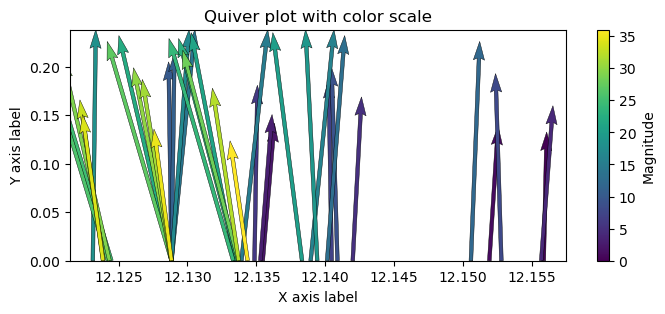

In [158]:
if FL == 1:
    if film_side_right == 0:
        u_quiv_fl_dor = -new_f_y_flonly[29:]/bod_weight_N; # horizontal axis # (cut_FL:end)
        v_quiv_fl_dor = -new_f_x_flonly_flip[29:]/bod_weight_N; # vertical axis
    else:
        u_quiv_fl_dor = new_f_y_flonly[29:]/bod_weight_N; # horizontal axis # (cut_FL:end)
        v_quiv_fl_dor = new_f_x_flonly_flip[29:]/bod_weight_N; # vertical axis
    
    
    
    magnitude = range(len(x_quiv_fl))

    plt.figure(26)
    plt.subplots(figsize=(8,3))
    q = plt.quiver(x_quiv_fl, y_array_fl, u_quiv_fl_dor, v_quiv_fl_dor, magnitude,
                   scale_units='y', angles='uv', scale=1, 
                   linewidth=0.3, edgecolors='k')
    
    plt.colorbar(q, label='Magnitude')  # Add color bar
    
    min_V = 0 if np.min(v_quiv_fl_dor) > 0 else np.min(v_quiv_fl_dor)
    plt.ylim(min_V,np.max(v_quiv_fl_dor))
    #x_lims=(0,0.75)
    plt.xlabel('X axis label')  # Add labels if needed
    plt.ylabel('Y axis label')
    plt.title('Quiver plot with color scale')
   
    plt.show()
   

% *Displaying force direction in quiver plot for the HL (lateral view z-x)*


pstride_hl_quiv (79,) x_quiv_hl (79,) y_array_hl (79,) u_quiv_hl_lat (79,) v_quiv_hl_lat (79,)
magnitude_hl range(0, 79)


<Figure size 640x480 with 0 Axes>

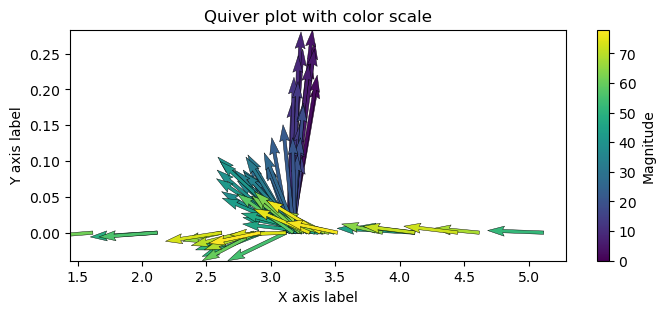

In [139]:

if HL == 1:

    cut_HL = int(cut_HL)
    
    if film_side_right == 0:
        pstride_hl_quiv = pstride_hlonly[:cut_HL]
        
        x_quiv_hl = -pt9_Xcop_hlonly[:cut_HL]
        quiv_hl_size = len(x_quiv_hl)
        y_array_hl = np.zeros(quiv_hl_size) # zero
        
        u_quiv_hl_lat = -new_f_y_hlonly[:cut_HL]/bod_weight_N # horizontal axis
        v_quiv_hl_lat = new_f_z_hlonly[:cut_HL]/bod_weight_N # vertical axis
    else:
        pstride_hl_quiv = pstride_hlonly[:cut_HL]
        
        x_quiv_hl = pt9_Xcop_hlonly[:cut_HL]
        quiv_hl_size = len(x_quiv_hl)
        y_array_hl = np.zeros(quiv_hl_size ) # zero
        
        u_quiv_hl_lat = new_f_y_hlonly[:cut_HL]/bod_weight_N # horizontal axis
        v_quiv_hl_lat = new_f_z_hlonly[:cut_HL]/bod_weight_N # vertical axis
    
    
    print("pstride_hl_quiv", pstride_hl_quiv.shape, "x_quiv_hl", x_quiv_hl.shape, "y_array_hl", y_array_hl.shape,
        "u_quiv_hl_lat", u_quiv_hl_lat.shape,  "v_quiv_hl_lat", v_quiv_hl_lat.shape )
    
    magnitude_hl = range(len(x_quiv_hl))
    print("magnitude_hl", magnitude_hl)

    plt.figure(27)
    plt.subplots(figsize=(8,3))
    q = plt.quiver(x_quiv_hl, y_array_hl, u_quiv_hl_lat, v_quiv_hl_lat, magnitude_hl,
                   scale_units='y', angles='uv', scale=1, 
                   linewidth=0.3, edgecolors='k')
    
    plt.colorbar(q, label='Magnitude')  # Add color bar
    
    min_V = 0 if np.min(v_quiv_hl_lat) > 0 else np.min(v_quiv_hl_lat)
    plt.ylim(min_V,np.max(v_quiv_hl_lat))
    plt.xlabel('X axis label')  # Add labels if needed
    plt.ylabel('Y axis label')
    plt.title('Quiver plot with color scale') 
    plt.show()
    
    


% *Displaying force direction in quiver plot for the HL (dorsal view y-x)*
% Note: new_f_y_flonly is x in video

<Figure size 640x480 with 0 Axes>

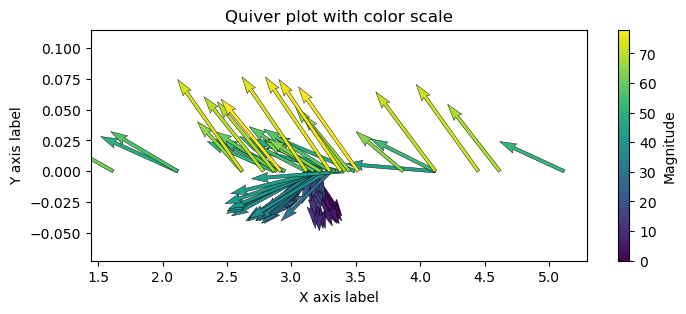

In [148]:
if HL == 1:
    if film_side_right == 0:
        u_quiv_hl_dor = -new_f_y_hlonly[:cut_HL]/bod_weight_N # horizontal axis # [:cut_HL]
        v_quiv_hl_dor = -new_f_x_hlonly[:cut_HL]/bod_weight_N # vertical axis
    else:
        u_quiv_hl_dor = new_f_y_hlonly[:cut_HL]/bod_weight_N # horizontal axis # [:cut_HL]
        v_quiv_hl_dor = new_f_x_hlonly[:cut_HL]/bod_weight_N # vertical axis
    
    
    plt.figure(28)
    plt.subplots(figsize=(8,3))
    q = plt.quiver(x_quiv_hl, y_array_hl, u_quiv_hl_dor, v_quiv_hl_dor, magnitude_hl,
                   scale_units='y', angles='uv', scale=1.5, 
                   linewidth=0.3, edgecolors='k')
    
    plt.colorbar(q, label='Magnitude')  # Add color bar
    
    min_V = 0 if np.min(v_quiv_hl_dor) > 0 else np.min(v_quiv_hl_dor)
    plt.ylim(min_V,np.max(v_quiv_hl_dor))
    #x_lims=(0,0.75)
    plt.xlabel('X axis label')  # Add labels if needed
    plt.ylabel('Y axis label')
    plt.title('Quiver plot with color scale')
    #plt.grid(True)  # Add grid for better readability
    plt.show()


Forces Display for FL in Compass

Fl

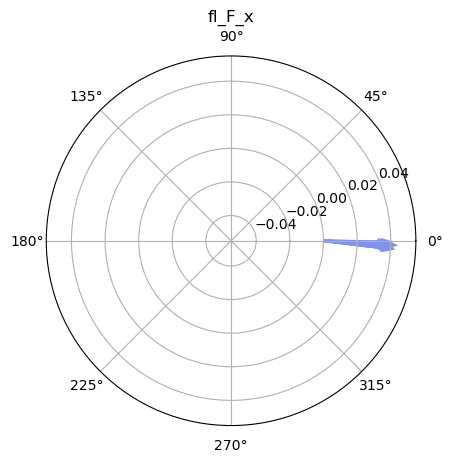

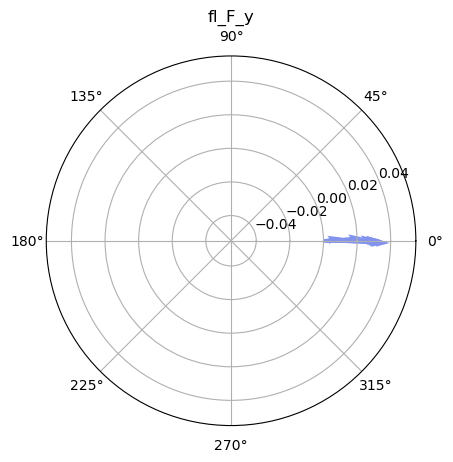

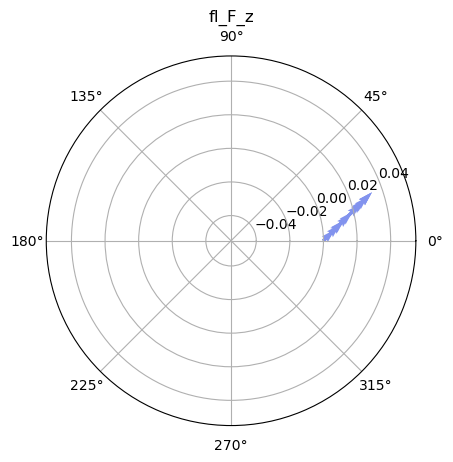

In [236]:
if FL == 1:
    fl_Fx_nth = fl_Fx_bw[1::200]
    fl_f0x_nth = fl_f_alphax[1::200]
    plt.figure(29)
    plt.subplot(polar = True)
    plt.quiver(np.zeros_like(fl_f0x_nth), np.zeros_like(fl_Fx_nth), fl_f0x_nth, fl_Fx_nth, color = '#8293ee', linewidth =.05, scale=10)
    plt.title('fl_F_x')
    
    fl_Fy_nth = fl_Fy_bw[1::200]
    fl_f0y_nth = fl_f_betay[1::200]
    plt.figure(30)
    plt.subplot(polar = True)
    plt.quiver(np.zeros_like(fl_f0y_nth), np.zeros_like(fl_Fy_nth), fl_f0y_nth, fl_Fy_nth, color = '#8293ee',  scale=10, linewidth =.05)
    plt.title('fl_F_y')
    
    fl_Fz_nth = fl_Fz_bw[1::200]
    fl_f0z_nth = fl_f_gammaz[1::200]
    plt.figure(31)
    plt.subplot(polar = True)
    plt.quiver(np.zeros_like(fl_f0z_nth), np.zeros_like(fl_f0z_nth), fl_Fz_nth, fl_Fz_nth, color = '#8293ee', linewidth =.005,scale=5)
    plt.title('fl_F_z')

plt.show()

HL

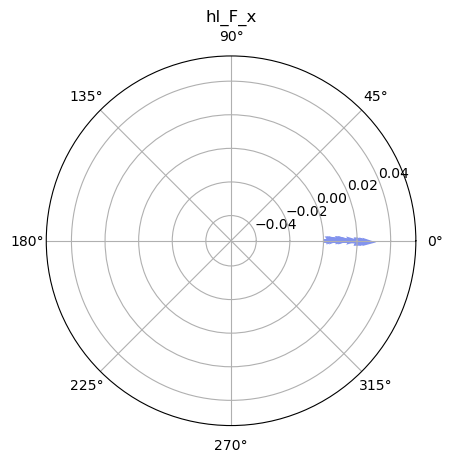

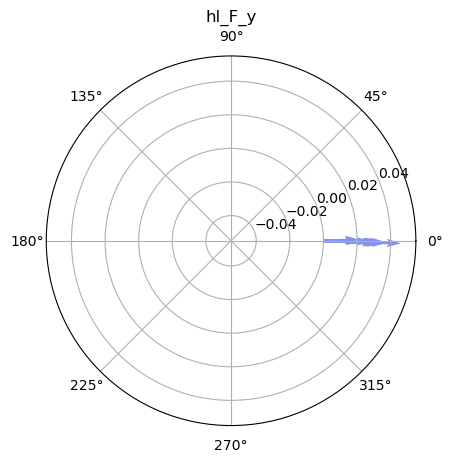

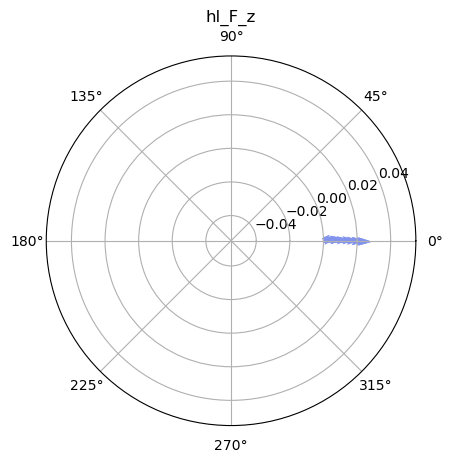

In [241]:

if HL==1:
    hl_Fx_nth = hl_Fx_bw[::200]
    hl_f0x_nth = hl_f_alphax[::200]
    plt.figure(32)
    plt.subplot(polar = True)
    plt.quiver(np.zeros_like(hl_f0x_nth), np.zeros_like(hl_f0x_nth), hl_f0x_nth, hl_Fx_nth, color = '#8293ee', scale = 15)  
    plt.title('hl_F_x')
    
    hl_Fy_nth = hl_Fy_bw[::200]
    hl_f0y_nth = hl_f_betay[::200]
    plt.figure(33)
    plt.subplot(polar = True)
    plt.quiver(np.zeros_like(hl_f0y_nth), np.zeros_like(hl_f0y_nth), hl_f0y_nth, hl_Fy_nth, color = '#8293ee', scale = 15)
    plt.title('hl_F_y')
    
    hl_Fz_nth = hl_Fz_bw[::200]
    hl_f0z_nth = hl_f_gammaz[::200]
    plt.figure(34)
    plt.subplot(polar = True)
    plt.quiver(np.zeros_like(hl_f0z_nth), np.zeros_like(hl_f0z_nth), hl_f0z_nth, hl_Fz_nth, color = '#8293ee', scale = 15)
    
    plt.title('hl_F_z')


Diplay of scaled and normalized data in feather()
Fl

Forces Display for FL in Polar Plots with normalized data
Fl

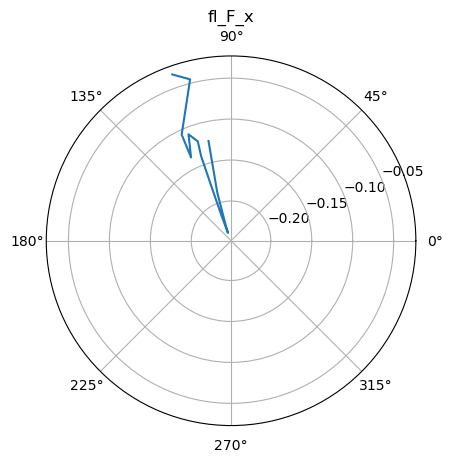

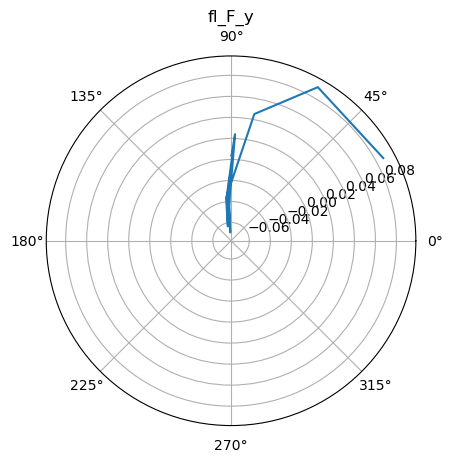

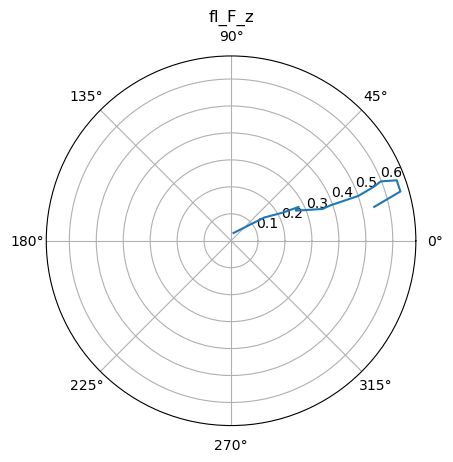

In [143]:
if FL ==1:
    
    plt.figure(35)
    plt.polar(fl_f0x_nth,fl_Fx_nth)
    plt.title('fl_F_x')
    
    plt.figure(36)
    plt.polar(fl_f0y_nth,fl_Fy_nth)
    plt.title('fl_F_y')
    
    plt.figure(37)
    plt.polar(fl_f0z_nth,fl_Fz_nth)
    plt.title('fl_F_z')

plt.show()

HL

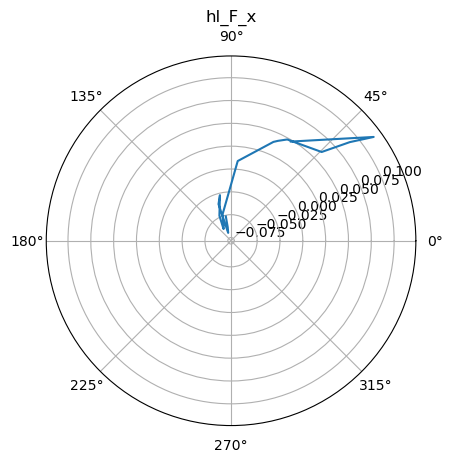

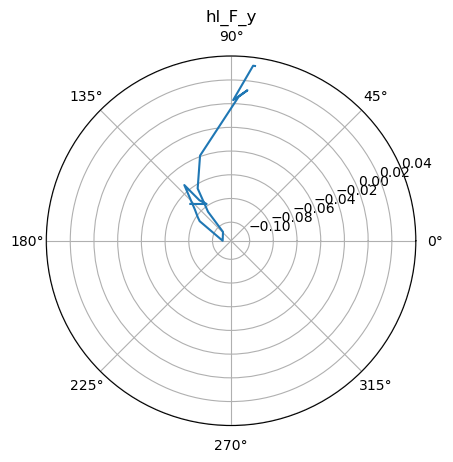

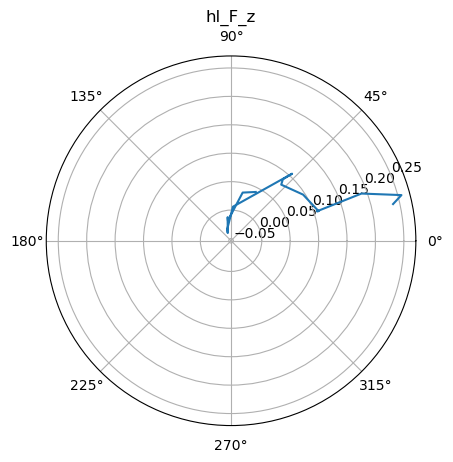

In [144]:
if HL ==1:
    
    plt.figure(38)
    plt.polar(hl_f0x_nth,hl_Fx_nth)
    plt.title('hl_F_x')
    
    plt.figure(39)
    plt.polar(hl_f0y_nth,hl_Fy_nth)
    plt.title('hl_F_y')
    
    plt.figure(40)
    plt.polar(hl_f0z_nth,hl_Fz_nth)
    plt.title('hl_F_z')

plt.show()

Diplay of scaled and normalized data in feather()

/Users/jenifer_dubon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


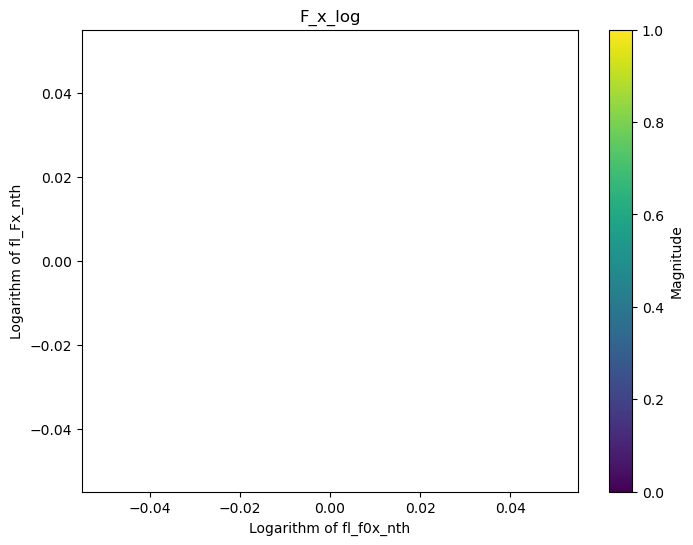

AttributeError: module 'matplotlib.pyplot' has no attribute 'feather'

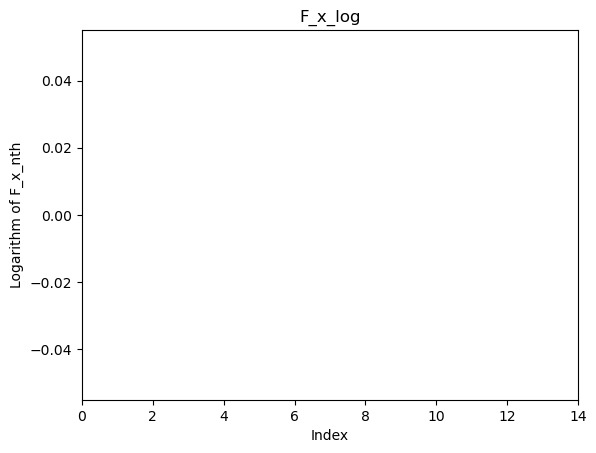

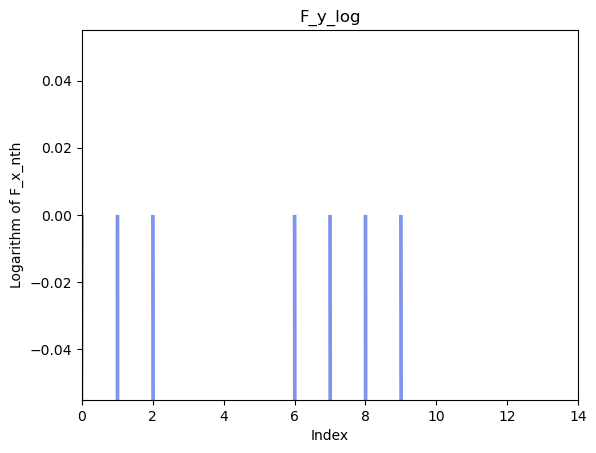

<Figure size 640x480 with 0 Axes>

In [280]:
if FL == 1:
    fl_Fx_log = np.log10(fl_Fx_nth)
    fl_Fx_deg_log = np.log10(fl_f0x_nth)
    
    
    """ magnitude_hl = range(len(x_quiv_hl))
    print("magnitude_hl", magnitude_hl)

    plt.figure(27)
    plt.subplots(figsize=(8,3))
    q = plt.quiver(x_quiv_hl, y_array_hl, u_quiv_hl_lat, v_quiv_hl_lat, magnitude_hl,
                   scale_units='y', angles='uv', scale=1, 
                   linewidth=0.3, edgecolors='k')
    
    plt.colorbar(q, label='Magnitude')  # Add color bar
    
    min_V = 0 if np.min(v_quiv_hl_lat) > 0 else np.min(v_quiv_hl_lat)
    plt.ylim(min_V,np.max(v_quiv_hl_lat))
    plt.xlabel('X axis label')  # Add labels if needed
    plt.ylabel('Y axis label')
    plt.title('Quiver plot with color scale') 
    plt.show()"""
    

    
    mag_fl = np.arange(len(fl_Fx_log))
    
    # For F_x
    plt.figure(41, figsize=(8, 6))
    
    q = plt.quiver(np.zeros_like(fl_Fx_deg_log), np.zeros_like(fl_Fx_log), fl_Fx_deg_log, fl_Fx_log,
                    scale=1, angles='xy', scale_units='xy',
                   linewidth=0.3, edgecolors='k')
    
    plt.colorbar(q, label='Magnitude')
    
    
    plt.title('F_x_log')
    plt.xlabel('Logarithm of fl_f0x_nth')
    plt.ylabel('Logarithm of fl_Fx_nth')
    plt.show()
  
    
    
    plt.figure(42)
    plt.quiver(np.arange(len(fl_f0x_nth)), np.zeros(len(fl_Fx_log)), 
               fl_f0x_nth, fl_Fx_log, color = '#8293ee',
               angles='xy', scale_units='xy', scale=1) #have to modify it so it is more accurate 
    plt.title('F_x_log')
    plt.xlabel('Index')
    plt.ylabel('Logarithm of F_x_nth')
    plt.xlim(0, len(fl_Fx_log))
   
    
    #for fy
    fl_Fy_log = np.log10(fl_Fy_nth)
    fl_Fy_deg_log = np.log10(fl_f0y_nth)
    plt.figure(43)
    plt.quiver(np.arange(len(fl_Fy_deg_log)), np.zeros(len(fl_Fy_log)), 
               fl_Fy_deg_log, fl_Fy_log, color = '#8293ee',
               angles='xy', scale_units='xy', scale=1) #have to modify it so it is more accurate 
    plt.title('F_y_log')
    plt.xlabel('Index')
    plt.ylabel('Logarithm of F_x_nth')
    plt.xlim(0, len(fl_Fy_log))

    
    #for fz
    fl_Fz_log = np.log10(fl_Fz_nth)
    fl_Fz_deg_log = np.log10(fl_f0z_nth)
    plt.figure(44)
    plt.feather(np.arange(len(fl_Fz_deg_log)), np.zeros(len(fl_Fz_log)), 
               fl_Fz_deg_log, fl_Fz_log, color = '#8293ee',
               angles='xy', scale_units='xy', scale=1) #have to modify it so it is more accurate 
    plt.title('F_z_log')
    plt.xlabel('Index')
    plt.ylabel('Logarithm of F_x_nth')
    plt.xlim(0, len(fl_Fz_log))
    

    plt.show()
    
    
    
    

HL

AttributeError: module 'matplotlib.pyplot' has no attribute 'feather'

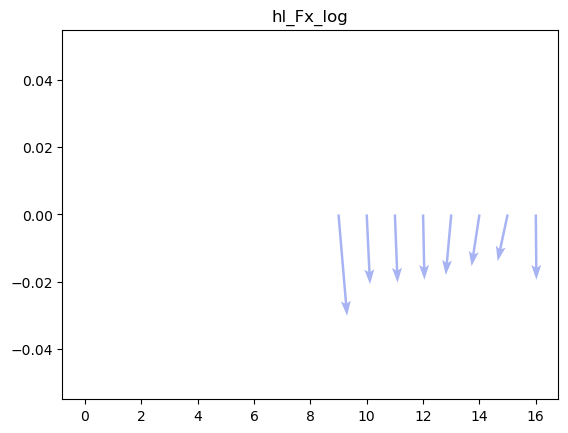

<Figure size 640x480 with 0 Axes>

In [276]:
if HL==1:
    hl_Fx_log = np.log10(hl_Fx_nth)
    hl_Fx_deg_log = np.log10(hl_f0x_nth)
   #for f_x
    plt.figure(45)
    plt.quiver(hl_Fx_deg_log, hl_Fx_log,  scale=10, color = '#8293ee')
    plt.title ('hl_Fx_log')       
   
    
   #for fy
    hl_Fy_log = np.log10(hl_Fy_nth)
    hl_Fy_deg_log = np.log10(hl_f0y_nth)
    plt.figure(46)
    plt.feather(hl_Fy_deg_log,hl_Fy_log)
    plt.title ('hl_Fy_log')       
   #for fz
    hl_Fz_log = np.log10(hl_Fz_nth)
    hl_Fz_deg_log = np.log10(hl_f0z_nth)
    plt.figure(47)
    plt.feather(hl_Fz_deg_log,hl_Fz_log)
    plt.title ('hl_Fz_log') #

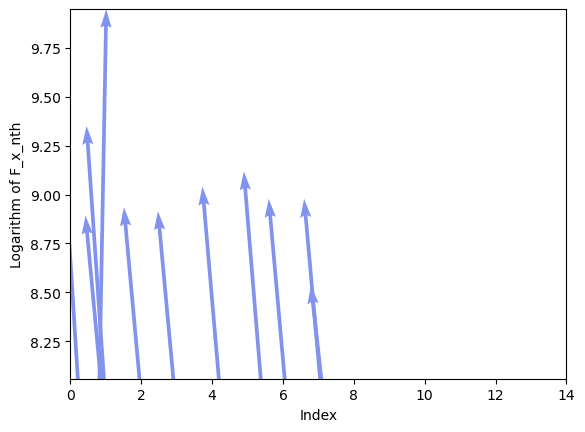

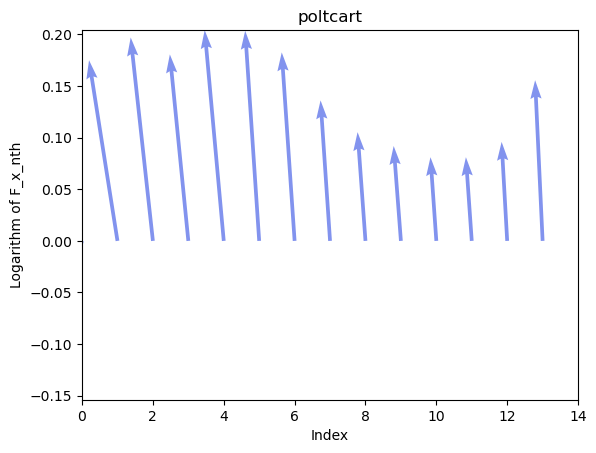

In [281]:
u = 10* np.sin(fl_Fz_deg_log )
v = 10* np.cos(fl_Fz_deg_log)

plt.quiver(np.arange(len(u)), np.zeros(len(v)), 
               u, v, color = '#8293ee',
               angles='xy', scale_units='xy', scale=1) #have to modify it so it is more accurate 
plt.xlabel('Index')
plt.ylabel('Logarithm of F_x_nth')
plt.xlim(0, len(v))
plt.ylim(min(v), max(v))

plt.show()



h = fl_Fz_log * np.cos(fl_Fz_deg_log)
j = fl_Fz_log * np.sin(fl_Fz_deg_log)

u = 10* np.sin(fl_Fz_deg_log )
v = 10* np.cos(fl_Fz_deg_log)

plt.quiver(np.arange(len(h)), np.zeros(len(j)), 
               h, j, color = '#8293ee',
               angles='xy', scale_units='xy', scale=1) #haje to modify it so it is more accurate 
plt.xlabel('Index')
plt.ylabel('Logarithm of F_x_nth')
plt.xlim(0, len(j))
plt.ylim(min(j), max(j))
plt.title ('poltcart')
plt.show()

Creating an y-axis autoscale
Adjusting Y-axis based upon maximum and min force readings
This is an auto-scale in a sense for the graph in the following section

In [ ]:
if  HL == 1:
    if FL == 1:
        max1 = np.max(f_x_flonly)
        max2 = np.max(f_y_flonly)
        max3 = np.max(f_z_flonly)
        max4 = np.max(f_r_flonly)
        max5 = np.max(f_x_hlonly)
        max6 = np.max(f_y_hlonly)
        max7 = np.max(f_z_hlonly)
        max8 = np.max(f_r_hlonly)
        maxcat = [max1, max2, max3, max4, max5, max6, max7, max8]
        maxy = np.max(maxcat)
        min1 = np.min(f_x_flonly)
        min2 = np.min(f_y_flonly)
        min3 = np.min(f_z_flonly)
        min4 = np.min(f_r_flonly)
        min5 = np.min(f_x_hlonly)
        min6 = np.min(f_y_hlonly)
        min7 = np.min(f_z_hlonly)
        min8 = np.min(f_r_hlonly)
        mincat = [min1, min2, min3, min4, min5, min6, min7, min8]
        miny = np.min(mincat)
        scale = [miny, maxy]
    elif FL == 0:
        max5 = np.max(f_x_hlonly)
        max6 = np.max(f_y_hlonly)
        max7 = np.max(f_z_hlonly)
        max8 = np.max(f_r_hlonly)
        maxcat = [max5, max6, max7, max8]
        maxy = np.max(maxcat)
        min5 = np.min(f_x_hlonly)
        min6 = np.min(f_y_hlonly)
        min7 = np.min(f_z_hlonly)
        min8 = np.min(f_r_hlonly)
        mincat = [min5, min6, min7, min8]
        miny = np.min(mincat)
        scale = [miny, maxy]
    
else:
    max1 = np.max(f_x_flonly)
    max2 = np.max(f_y_flonly)
    max3 = np.max(f_z_flonly)
    max4 = np.max(f_r_flonly)
    maxcat = [max1, max2, max3, max4]
    maxy = np.max(maxcat)
    min1 = np.min(f_x_flonly)
    min2 = np.min(f_y_flonly)
    min3 = np.min(f_z_flonly)
    min4 = np.min(f_r_flonly)
    mincat = [min1, min2, min3, min4]
    miny = np.min(mincat)
    scale = [miny, maxy]

print(maxcat)

: 

: 

: 

: 

: 